# Chapter 5: Probability Distributions

__Probability__ takes on a value from 0 to 1, with a probability $P(X) = 0$ for an event meaning that the stated condition - e.g., a standard 6 sided die will yield a 7 when rolled -  would never occur in an infinite number of flips. A probability of 0.5 means that in a sufficiently large number of trials, approximately half of the trials would result in the stated condition. A probability of 1 means all trials would result in the stated condition so that the number of successes in a trial would be equal to the number of attempts. 

__Probability Distributions__ display all of the possible values that a _random variable_ $X$ could take on on the x-axis, and the corresponding probability of that value on the y-axis. Hence, the area under the probability distribution will always be equal to one. 
   - The random variable $\bar{X}$, which represents the the mean of a sample drawn from a larger population, defines a _**sampling distribution**_, which gives all values possible for $\bar{X}$, $\bar{X_i}$, and the probability of that value occuring. $\bar{X}$ can take on values falling on its sampling distribution, which describe the likelihood of getting a given mean for a given sample size.  This sampling distribution takes on a standard deviation of $\frac{S}{\sqrt(n)}$, otherwise known as the **standard error.** 

Distributions can be described by: 
- Their mean, $\mu$(or $\bar{X}$ for sampling distributions), which is the average value of the dataset.  
- Their standard deviation, $\sigma$, which determines how flat the curve is, and how densely the data clusters around the mean(SE for sampling distributions).
- Skewness, $S_{KP}$, which refers to a distortion or asymmetry of a distribution. 
- Kurtosis, $k$, which describes how much of the distribution lays in its tails. 

### Types of Probability Distributions
#### Normal Distributions
Normal Distribution, also known as Gaussian distribution, is ubiquitous in Data Science and often used when modeling economic phenomena. You will encounter it in predictive models you create. It is one of the assumptions of many statistical techniques.

A normal distribution has a bell-shaped density curve described by its mean $\mu$ and standard deviation $\sigma$. The density curve is symmetrical(skewness of 0), centered about its mean, with its spread determined by its standard deviation. Data near the mean - e.g., $\sigma < 1$ - are more frequent in occurrence than data far from the mean - e.g., $\sigma > 2$. 


A random variable $X$ which follows a normal distribution with mean $\mu$ and standard deviation $\sigma$ and has this density function: 
<h3 align="center">
    <font size="4">
        $ X = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^2} $
    </font>
    </h3> 
    
If one knew the mean and standard deviation of a particular distribution, it would be possible to estimate the probability of drawing a value from a particular range - e.g., $a \leq X \leq b$ - by taking the definite integral of this function: 
<h3 align="center">
    <font size="4">
        $\int_{a}^{b}\frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^2}dx$.
    </font>
</h3>

#### Standard Normal Distribution

The standardized normal distribution is the most important member of the family of normal probability distributions—the one with $\mu = 0$  and $\sigma = 1$. The normal random variable distributed according to the standard normal distribution is called the standard normal variable and is denoted by $Z$. It represents the number of standard deviations a given point X lies from the mean of the standard normal distribution.  It is expressed as
<h3 align="center">
    <font size="4">
        $ Z =  \frac{X-\mu}{\sigma}$
    </h3> 

A key feature of all distributions is that, using the equation above, they can be transformed to be analyzed using the standard normal distribution.
    
_If you divide any normal distribution by its standard deviation(normalizing the SD to be 1), that normal distribution becomes the standard normal distribution._

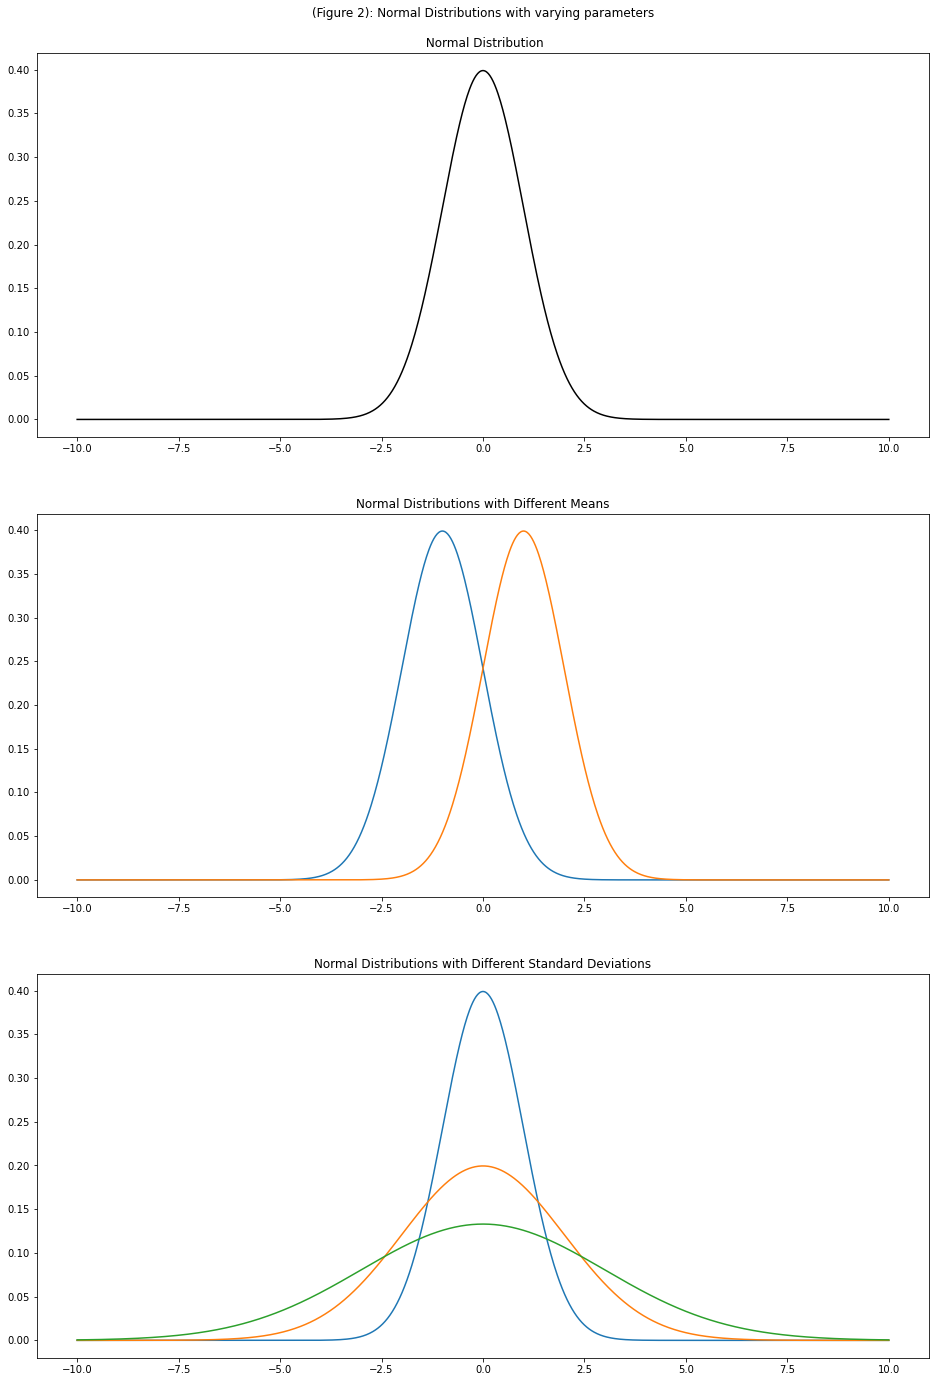

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
from stats import *

# define normal distribution function
# Optionally, pass different array of x values tp be transformed; default is np.linspace(-5, 5, 1000)
def normal_dist(mean , sd, x = np.linspace(-10, 10, 1000)):
    prob_density = 1 / (sd * (2 * np.pi) ** .5) * np.exp(-0.5*((x-mean)/sd)**2)
    return prob_density

# set up plot
fig, axs = plt.subplots(3, 1, figsize=(16, 24))
x = np.linspace(-10, 10, 1000)
                
# perform transformation
normal_dist_list = normal_dist(mean=0, sd=1)
axs[0].plot(x, normal_dist_list, 
            label= " Standard Normal Distribution", c='k')
axs[0].set_title("(Figure 2): Normal Distributions with varying parameters\n\n Normal Distribution")

# plot normal curves with varying means 
for mean_ in range(-1,3, 2):
    normal_dist_list = normal_dist(mean=mean_, sd=1)
    axs[1].plot(x, normal_dist_list, label= "Normal Distribution")
axs[1].set_title("Normal Distributions with Different Means")
    
# plot normal curves with varying standard deviations 
for sd in range(1,4):
    normal_dist_list = normal_dist(mean=0, sd=sd)
    axs[2].plot(x, normal_dist_list, label= "Normal Distribution")
    axs[2].set_title("Normal Distributions with Different Standard Deviations")

## Lognormal Distribution

A random variable $X$ is said to have a lognormal distribution if $Y = ln(X)$ is normally distributed, where $ln$ denotes the natural logarithm.

In other words, $X$ is log-normally distributed if the natural logarithm of $X$ is normally distributed with mean $\mu$  and variance $\sigma ^2$:

$ln(X) = N(\mu, \sigma^2)$

The lognormal distribution is positively skewed with many small values and just a few large values. Consequently, the mean is greater than the mode in most cases.
Since the lognormal distribution is bound by zero on the lower side, it is perfect for modeling asset prices that cannot take negative values. On the other hand, the normal distribution cannot be used for the same purpose because it has a negative side.

When the returns on a stock (continuously compounded) follow a normal distribution(as shown above), the stock prices follow a lognormal distribution. Note that even if returns do not follow a normal distribution, the lognormal distribution is still the most appropriate model for stock prices.

The probability density function of the distribution is:
<h3 align="center">
    <font size="4">
        $f(x) = \frac{1}{x\sigma\sqrt{2\pi}}e^{\frac{- (lnx-\mu)^2}{2\sigma^2}}$
    </font>
    </h3> 



Text(0.5, 1.0, 'Lognormal Distribution with μ = 0 and σ = 1')

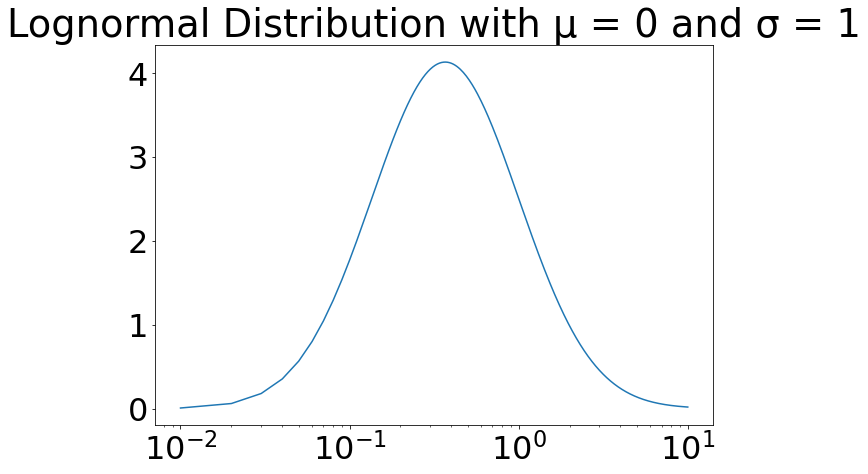

In [41]:
import warnings
warnings.filterwarnings("ignore")
# Optionally, pass different array of x values tp be transformed; default is np.linspace(-5, 5, 1000)
def create_lognormal(mean, sd, x = np.linspace(0, 10, 1000)):
    density_points = (1 / x*sd*np.sqrt(2*math.pi))*math.e**(-(np.log(x)-mean)**2 / (2*sd**2))
    return density_points

fig, ax = plt.subplots(figsize=(10, 7))
x = np.linspace(0, 10, 1000)
lognorm = create_lognormal(0, 1,x)
ax.plot(x, lognorm)
plt.xscale("log")
ax.set_title("Lognormal Distribution with μ = 0 and σ = 1")

### Binomial Distribution
If $X$ is a random variable that yields the number of successess seen in the trials of a binomial(yes or no) experiment, then we say that $X$ follows a binomial distribution.

We are interested in finding the probability that some particular number of successes is seen in the course of that binomial experiment.

- $n$ = the number of trials
- $x$ = some number of successes, with $0≤x≤n$
- $p$ = the probability of success on any one trial
- $q$ = $1−p$ = the probability of failure on any one trial

A binomial trial can result in a success with probability $p$ and a failure with probability $q = 1−p$. Then the probability distribution of the binomial random variable $X$, the number of successes in $n$ independent trials, is
<h3 align="center">
    <font size="4">
        $b(x; n, p) = {n \choose x}p^xq^{n-x}$
    </font>
    </h3> 

Where  $x = 0, 1, 2,..., n$ and ${n \choose x}=\frac{n!}{x!(n-x)!}$

The most common example is flipping a coin, which can be modeled as $x=$ the number of "heads" or "tails" in $n$ trials. The probability of success and failure is 0.5. 

The mean $\mu$ and standard deviation $\sigma$ for a binomial distribution $b(x; n, p)$ are
- $\mu = np$
- $\sigma = \sqrt{np(1-p)}$

We define and graph the binomial distribution for various x, p, and n values. 

As an example of the binomial distribution, we can think of the top hedge funds in the stock market. If we assume that the markets are efficient and any given mutual fund only has a 50% probability of beating the market in every year, if there is a large $n$, or a large number of firms, many of them will survive for many years, just by chance. This example is demonstrated wonderfully in Burton Malkiel's *A Random Walk Down Wallstreet* in which he describes a coin flipping contest of 1000 people, which guarantees that multiple people will win more than 10 rounds simply by chance, and then become world-renouned as amazing coin-flippers. 

- How many funds will 'beat' an efficient market for more than 10 years if there are 1000 funds to start? We will find the probability of a single fund beating the market for that long and then multiply that by 1000 funds. 

- $ = P(1) = {10 \choose 1}0.5^{1}0.5^{10-1} = 0.0097$, so there is a 0.97% chance of a single fund beating an efficient market for 10 years, and we can reasonably expect that 97 funds will beat the market for 10 years if 100 start, just by chance. 


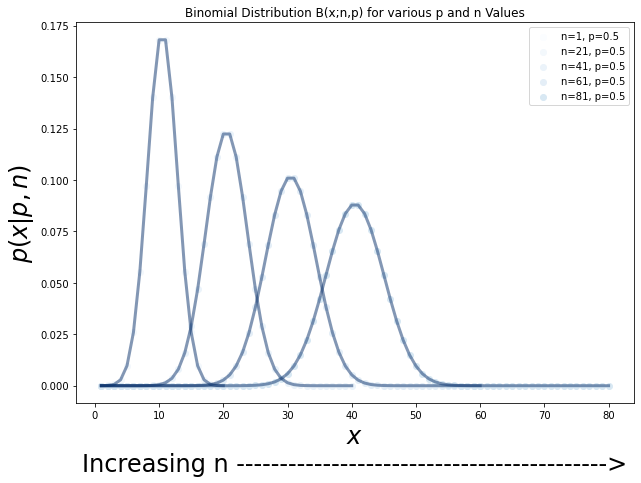

In [3]:
from matplotlib import cm
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import Normalize


# build binomial function
def binomial(x, n, p):
    return float(math.factorial(n)) / (
        math.factorial(x) * math.factorial(n - x)) * p**x * (1 - p)**(n - x)

fig, ax = plt.subplots(figsize=(10, 7))

cmap = cm.get_cmap('Blues')
norm = Normalize(vmin=-1, vmax=1)

p = 0.5

for n in range(1, 101, 20):
    binom_vars = [binomial(x, n, p) for x in range(1, n)]
    plt.scatter([x for x in range(1, n)],
                binom_vars,
                alpha=1,
                color=(norm(cmap(n))),
                label=f"n={n}, p={p}")
    plt.plot([x for x in range(1, n)],
             binom_vars,
             alpha=.5,
             linewidth=3,
             color=cmap(norm(n)))

plt.xlabel("$x$\nIncreasing n ------------------------------------------->",
           fontsize=24)
plt.ylabel("$p(x | p, n)$", fontsize=24)
plt.title("Binomial Distribution B(x;n,p) for various p and n Values")
plt.legend()
plt.show()

binomial(1, 10, 0.5)

## Poisson Distribution

The Poisson probability distribution applies to many random phenomena occurring during a period of time- for example, the number of faulty products coming off an assembly line in a day or week. It also applies to spatial phenomena such as, for example, the number of typing errors on a page.

A Poisson random variable is a discrete variable that can take on any integer value from zero to infinity. The value gives the number of occurrences of the circumstance of interest during a particular period of time or within a particular spatial area. A unit probability mass is assigned to this sample space. Our concern is then with the probability that there will be, for example, zero, one, two, three, etc., calls to the police during a particular time period on a typical day, or that in typing this chapter I will make zero, one, two, etc. errors on a particular page.

**The Poisson probability function is**

<h3 align="center">
    <font size="4">
        $ P(x) = \frac{\lambda^xe^{-\lambda}}{x!}$
    </font>
    </h3> 
    
where 
- $\lambda$ = the expected mean of x over many trials

- $x$ is the number of occurences that actually happen
      
- $P(X)$ is the probability that x would equal a given x value

The poisson tells us: what is the probability of x occurences happening in a timeframe when the expected number of occurrences is $\lambda$?

For example - what is the probability of 10 people quitting from your company this year when the average has historically been 5?
-  $ P(10) = \frac{5^{10}e^{-5}}{10!} = ~0.018$

- There is a 1.8% chance that 10 or more employees quit this year. 


Text(0, 0.5, 'Probability of\noccurence of x for λ')

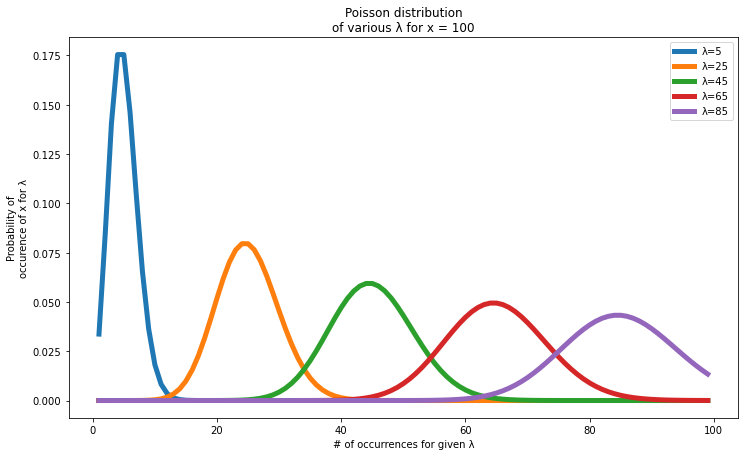

In [4]:
# substitute mean for lambda as lambda is a python keyword
def poisson(x, mean):
    p = ((mean**x) * (math.e**-mean)) / math.factorial(x)
    return p


fig, ax = plt.subplots(figsize=(12, 7))
x = 100
for mean_ in range(5, 100, 20):
    poisson_vars = [poisson(x, mean_) for x in range(1, x)]
    xs = np.arange(1, x)
    plt.plot(xs, poisson_vars, label=f"λ={mean_}", linewidth = 5)
plt.legend()
plt.title("Poisson distribution\nof various λ for x = 100")
plt.xlabel("# of occurrences for given λ")
plt.ylabel('Probability of\noccurence of x for λ')

## Working with Time Series Data

We will be working with stock price data. This data is an instance of time series data. The structure of untransformed time series data often violates the requirements of a random variable that observations be:

1. identitically distributed 
2. independent

To be identitically distributed means that observations are drawn from the same distribution. To be independent means that neighboring observations should not mutually influence one another. The independence criterion is typically violated for a single variable. Further, if two variables are subject to the I.I.D. assumptions, then not only must observations from a sample be subject to this criterion, but so too observations of the two variables must not be correlated. Here, we will show that individual samples are identically distributed. In a Chapter 6, we will be able to test whether or not the draws are observations of a given sample are independent of their neighbors. And in chpater 7, we will later consider the I.I.D. assumption when working with multiple variables using Ordinary Least Squares regression.

We will first show that unstransformed stock data is not identically distributed. But first, we need to download the data. We will use *pandas_datareader* to access yahoo finance. If you have not used this module before, install it using the command:

> *pip install pandas-datareader*

If you want to install this library from within Jupyter notebook, use:

> *!pip install pandas-datareader*

We will also need to install yfinance

> *!pip install yfinance*


In [5]:
# !pip install pandas-datareader
# !pip install yfinance
import pandas as pd
import pandas_datareader.data as web
import yfinance as yf
import datetime

yf.pdr_override()
start = datetime.datetime(2012, 1 , 1)
end = datetime.datetime.today()

data_dict = {}
stocks = ["MSFT", "AAPL", "PG", "TSLA"]
for key in stocks:
    data_dict[key] = web.get_data_yahoo(key, start, end)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Now save the closing price data for all four stocks in a single dataframe.

In [6]:
close_data = pd.concat([val["Close"] for val in data_dict.values()], 
                       keys = data_dict.keys(), 
                       axis = 1)
close_data.head()

,MSFT,AAPL,PG,TSLA
Date,,,,
2012-01-03,26.770000,14.686786,66.830002,1.872000
2012-01-04,27.400000,14.765714,66.800003,1.847333
2012-01-05,27.680000,14.929643,66.519997,1.808000
2012-01-06,28.110001,15.085714,66.360001,1.794000
2012-01-09,27.740000,15.061786,66.639999,1.816667


Let's plot the data for each stock in a single graph.

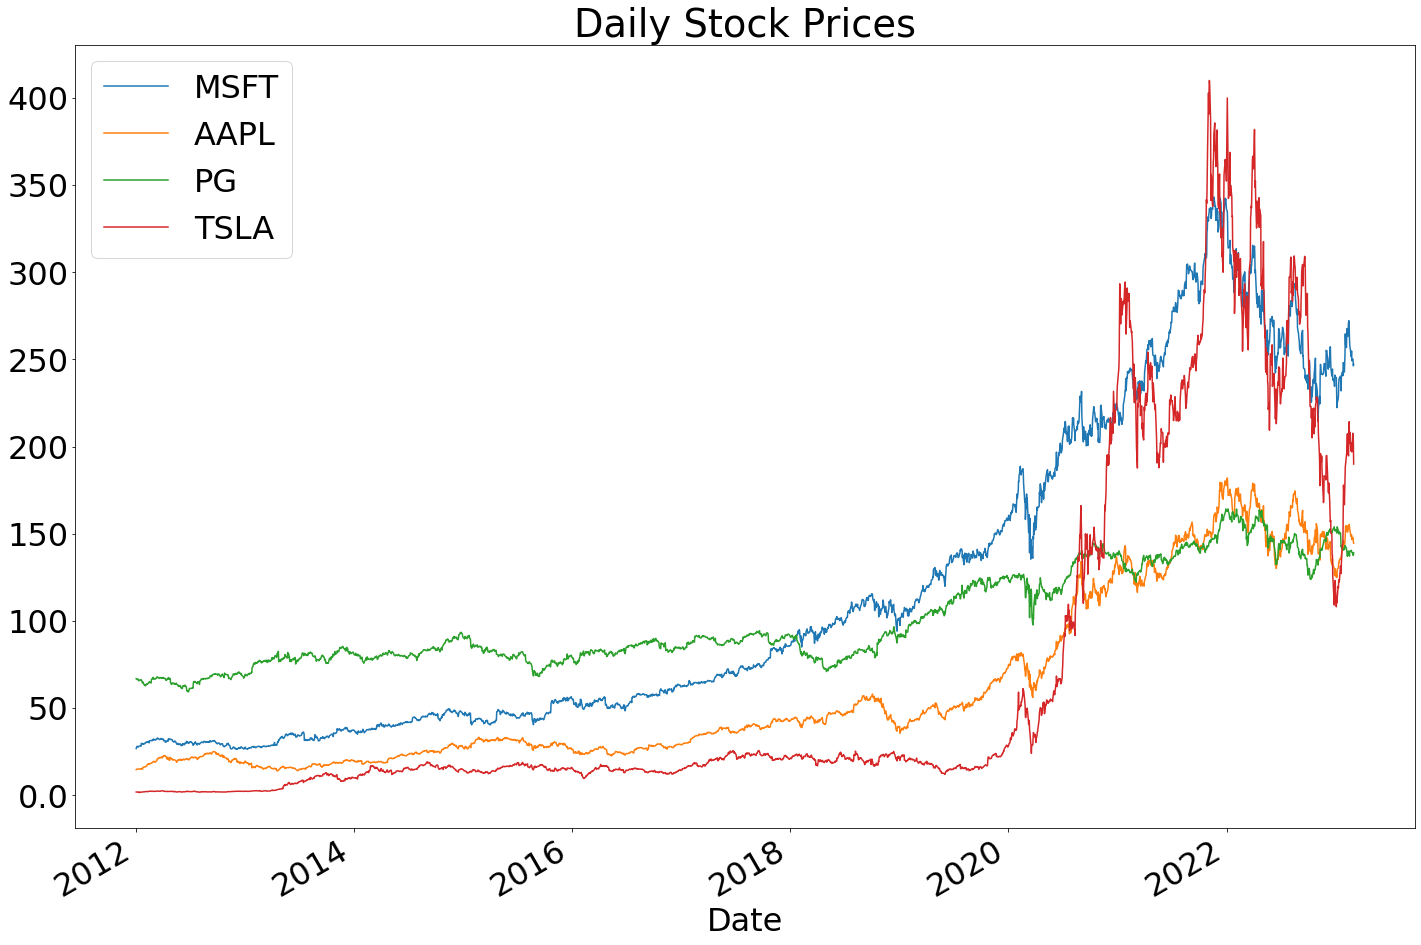

In [7]:
import matplotlib.pyplot as plt

# set default font size
plt.rcParams.update({'font.size': 32})
fig, ax = plt.subplots(figsize = (24,16))
close_data.plot.line(ax = ax, legend = True)
# reset y labels to integer from scientific notation
y_vals = ax.get_yticks()
ax.set_yticklabels([int(y) if y >= 1 else round(y,1) for y in y_vals])    

plt.title("Daily Stock Prices")
plt.show()
plt.close()

The data appears to be quite volatile. This is because we are viewing data in observed units rather than comparing changes in proportional terms. If we log the axis, we will see that the data actually is much more stable than would be suggested by the above graph. 

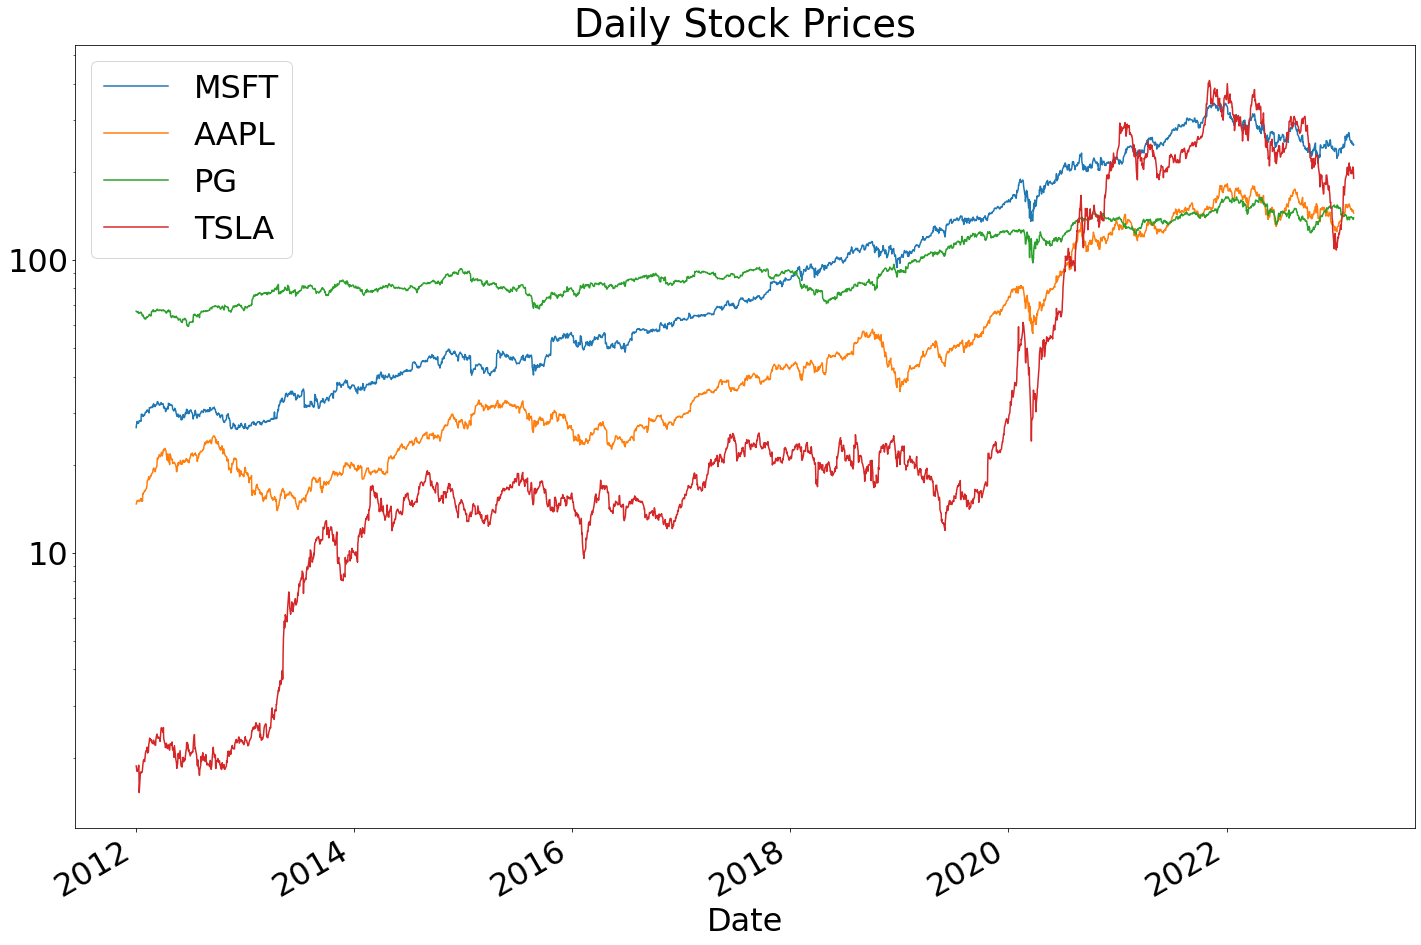

In [8]:
# set default font size
plt.rcParams.update({'font.size': 32})
fig, ax = plt.subplots(figsize = (24,16))
close_data.plot.line(ax = ax, legend = True)
# set y axis as logged to view changes in proportional terms
# instead of absolute terms
ax.set_yscale("log")
# reset y labels to integer from scientific notation
y_vals = ax.get_yticks()
ax.set_yticklabels([int(y) if y >= 1 else round(y,1) for y in y_vals])    

plt.title("Daily Stock Prices")
plt.show()
plt.close()

It may not be obvious that this data is not normally distributed. To clarify this, let's create a histogram:

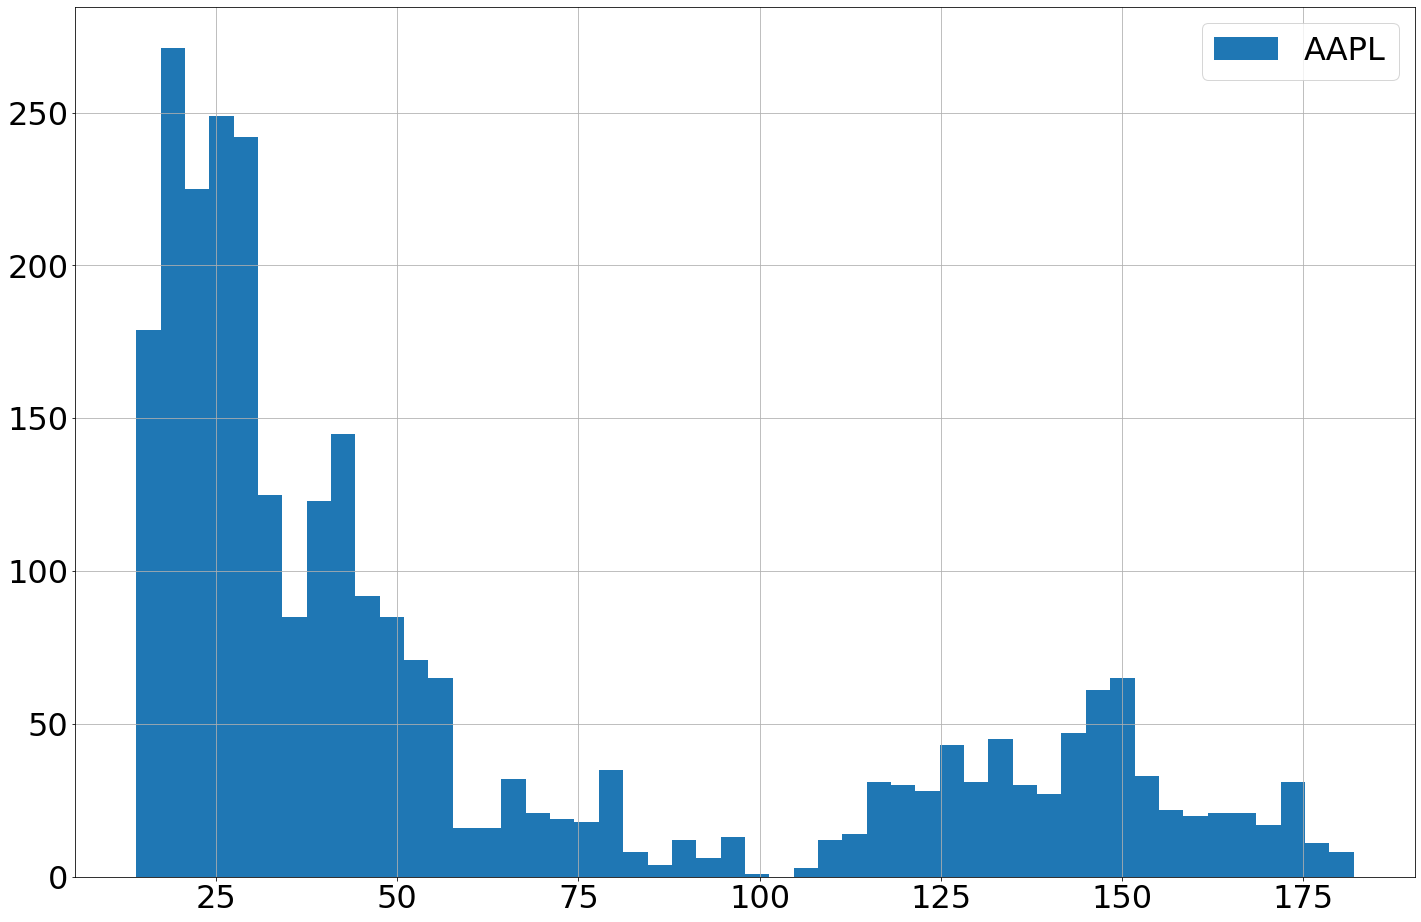

In [9]:
fig, ax = plt.subplots(figsize = (24, 16))
close_data["AAPL"].hist(bins = 50, label = "AAPL")
plt.legend()

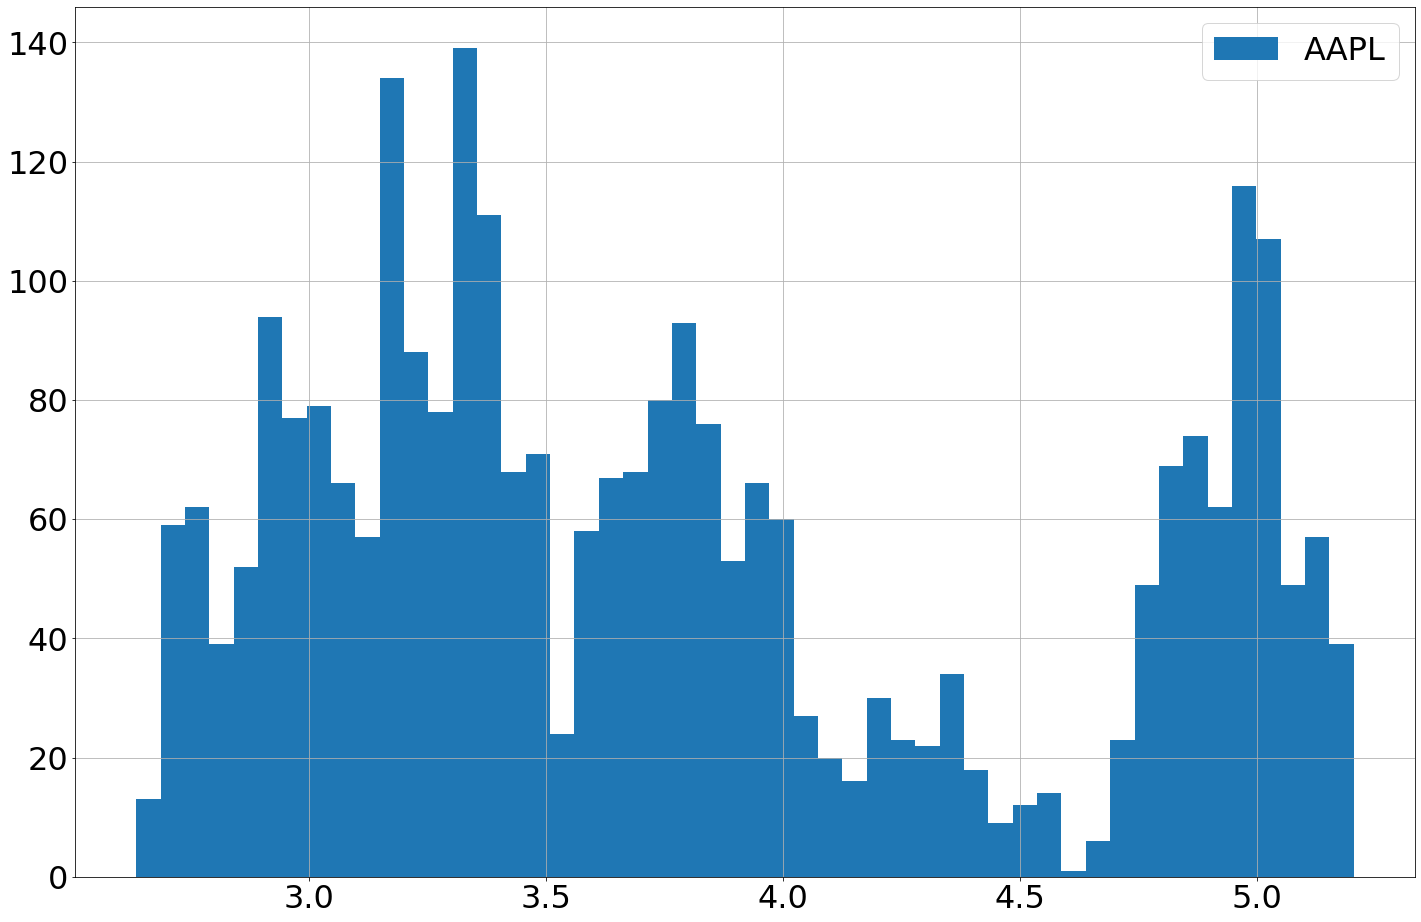

In [10]:
import numpy as np
log_data = np.log(close_data)
fig, ax = plt.subplots(figsize = (24, 16))
log_data["AAPL"].hist(bins = 50, label = "AAPL")
plt.legend()

Let's replot the data, separating observations by year and indicating the means of each year.

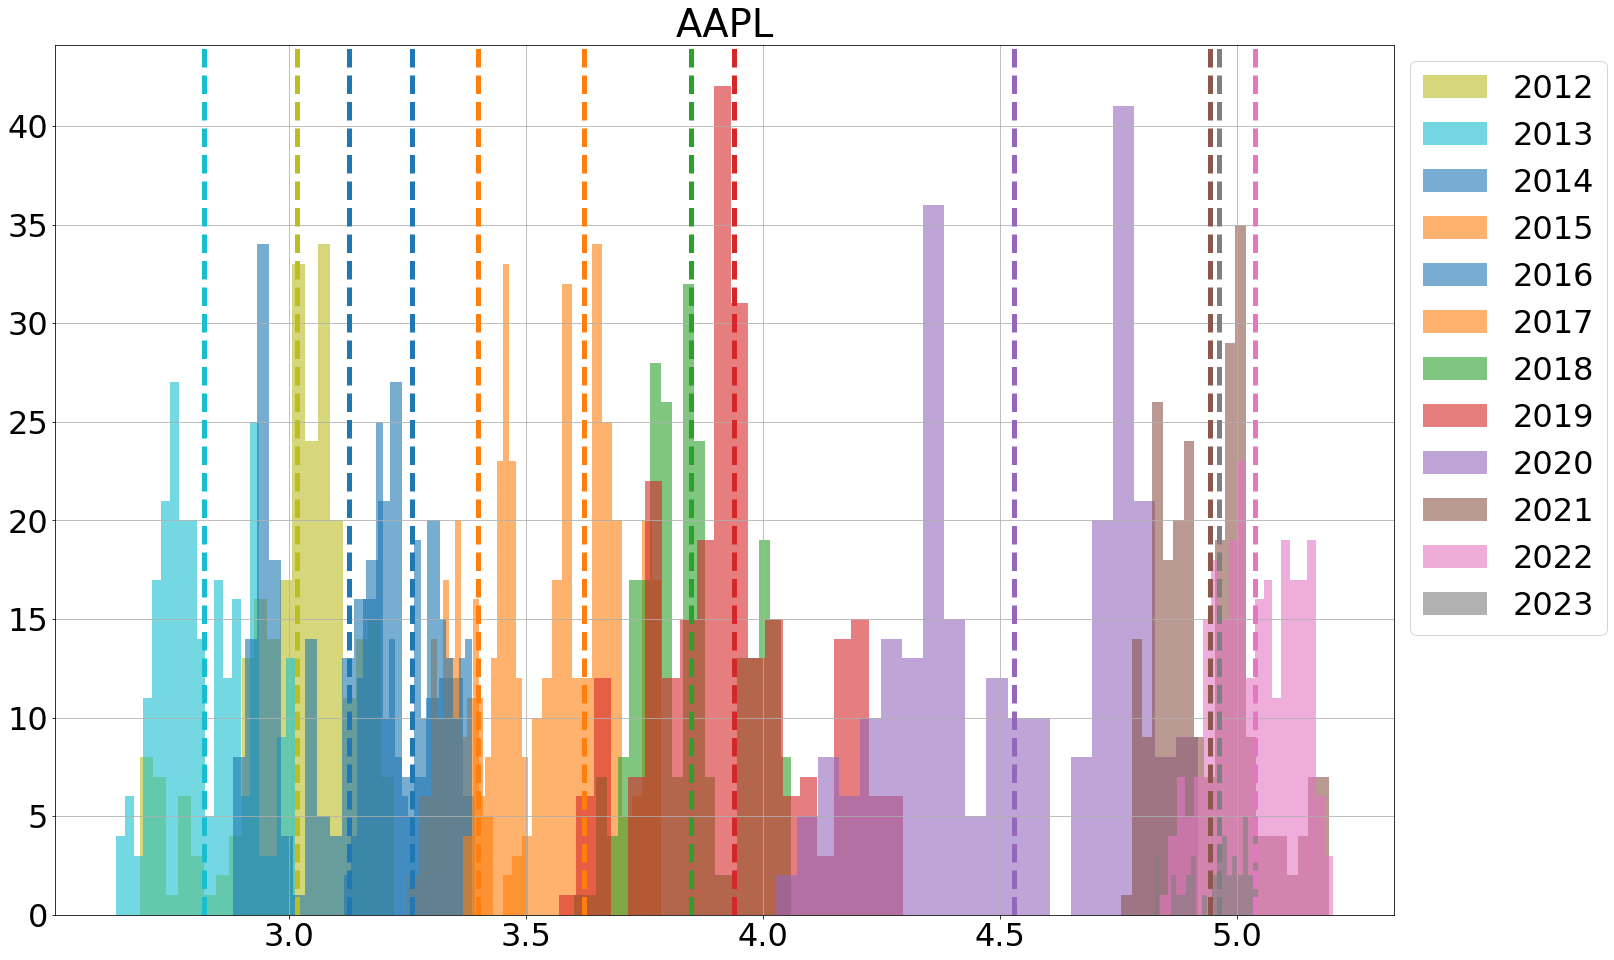

In [11]:
def graph_yearly_distributions(data, key):
    years = sorted(list(set(data.index.year)))
    fig, ax = plt.subplots(figsize = (24, 16))
    for year in years:
        color = "C" + str(year % 12)
        year = str(year)
        plot_data = data[key].loc[year]
        plot_data.hist(bins = 20, color = color,
                       label = year, 
                       alpha = .6, 
                       ax = ax)
        ax.axvline(plot_data.mean(), 
                   color = color, 
                   linewidth = 5, 
                   ls = "--")
    ax.set_title(key)
    ax.legend(bbox_to_anchor = (1,1))
graph_yearly_distributions(log_data, "AAPL")

These distributions drawn from annual data do not appear at all to converge upon a normal distribution, neither do these distributions have consistent mean value. Let's transform the data so that we observe the distribution of the daily rate of change of stock prices. We will take the difference of the log values to approximate the daily rate of change of the stock price. This will make the data more closely conform to the assumption that it is identically distributed. 

If the efficient markets hypothesis is correct in any form, the distribution of daily price changes should be approximately normally distributed. We will see that, over the long-run, the hypothesis is true, but over the short-run, we may find that the tails of distributions are relatively fat, that some stocks violate this assumption, and that daily price changes are often autocorrelated. Further, the absolute value of daily price changes is also autocorrelated.

In [12]:
# Log-difference will be a decimal. Transform to percent as whole number by multiplying by 100
price_change_data = log_data.diff().mul(100)

As with the untransformed data, it will be useful to view the transformed data in a timeseries plot. Notice how the data reflect periods of tremendous  volatility with other periods reflecting relative stability.

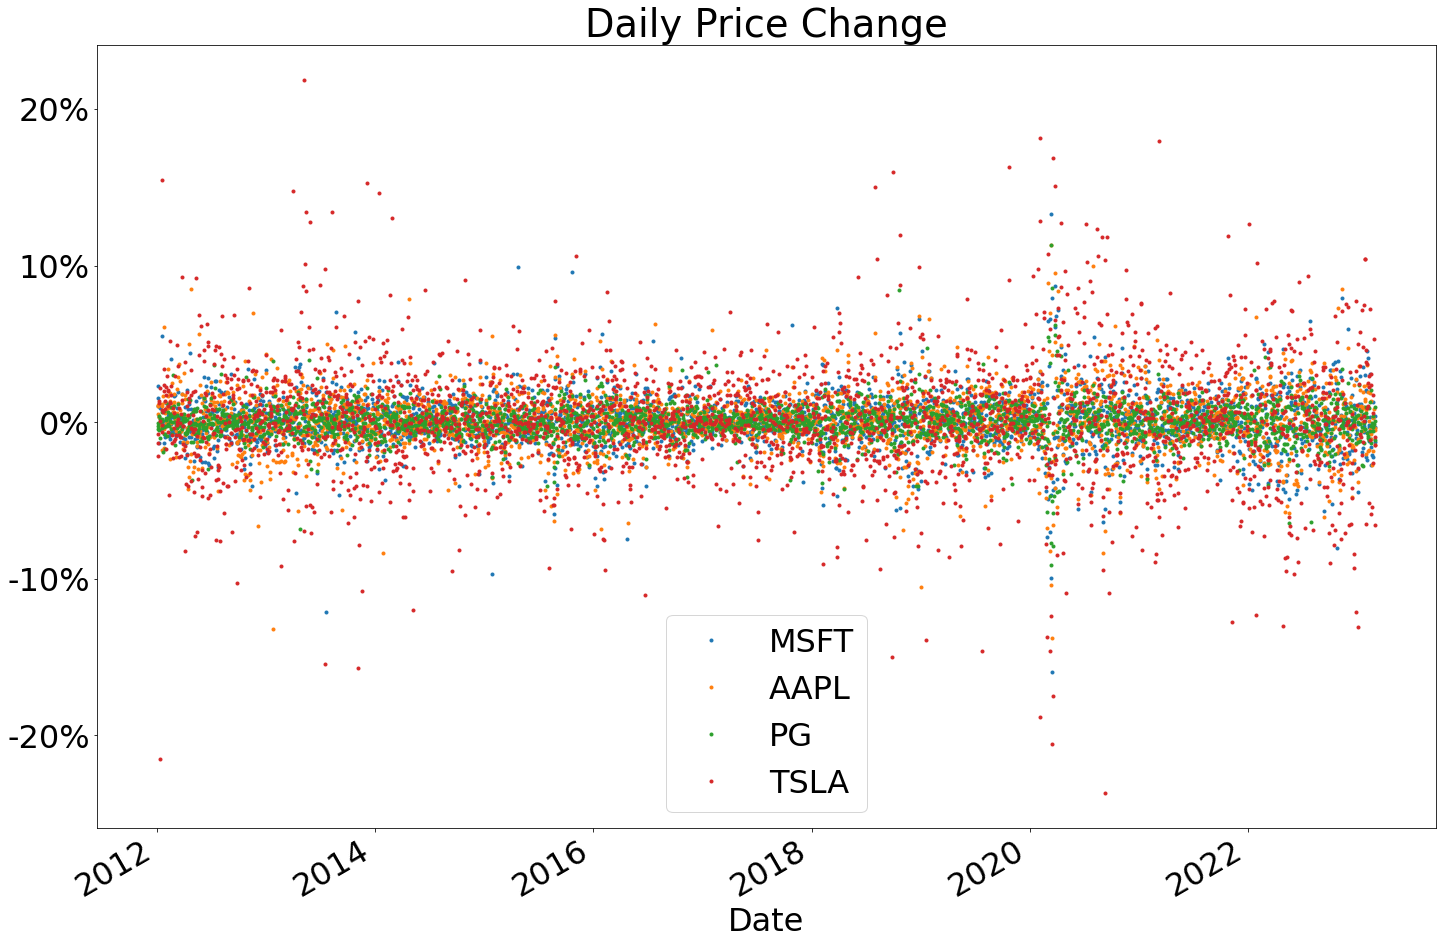

In [13]:
# set default font size
plt.rcParams.update({'font.size': 32})
fig, ax = plt.subplots(figsize = (24,16))
for key in price_change_data:
    # plot as scatter plot over time by setting marker to "." and ls to "" (blank)
    #price_change_data[key].scatter()
    price_change_data[key].plot.line(marker = ".", ls="", ax = ax)
plt.legend()
plt.title("Daily Price Change")
# set y labels to integer include %
y_vals = ax.get_yticks()
ax.set_yticklabels([str(int(y))+ "%" for y in y_vals])    

plt.show()
plt.close()

It will be helpful to plot the distribution of daily price changes for each stock. After building the initial plot, we will include statistics describing the mean, median, mode, standard deviation, skewness, and kurtosis.

First, let's prepare these statistics in a dataframe using the function we created at the beggining of the lesson.



In [14]:
from stats import *
stats_df = gather_statistics(price_change_data, sample = True).round(2)
stats_df


,MSFT,AAPL,PG,TSLA
mean,0.08,0.08,0.03,0.16
median,0.06,0.08,0.04,0.13
variance,2.82,3.36,1.29,12.88
S.D.,1.68,1.83,1.14,3.59
skewness,-0.22,-0.28,-0.04,-0.05
kurtosis,8.80,5.73,12.07,5.08


Now that we have taken the log-differenced value of stocks, the data is beginning to look more normally distributed and, therefore, may be identically distributed. Let's, once again, construct the aggregate distribution as well as the annual distributions:

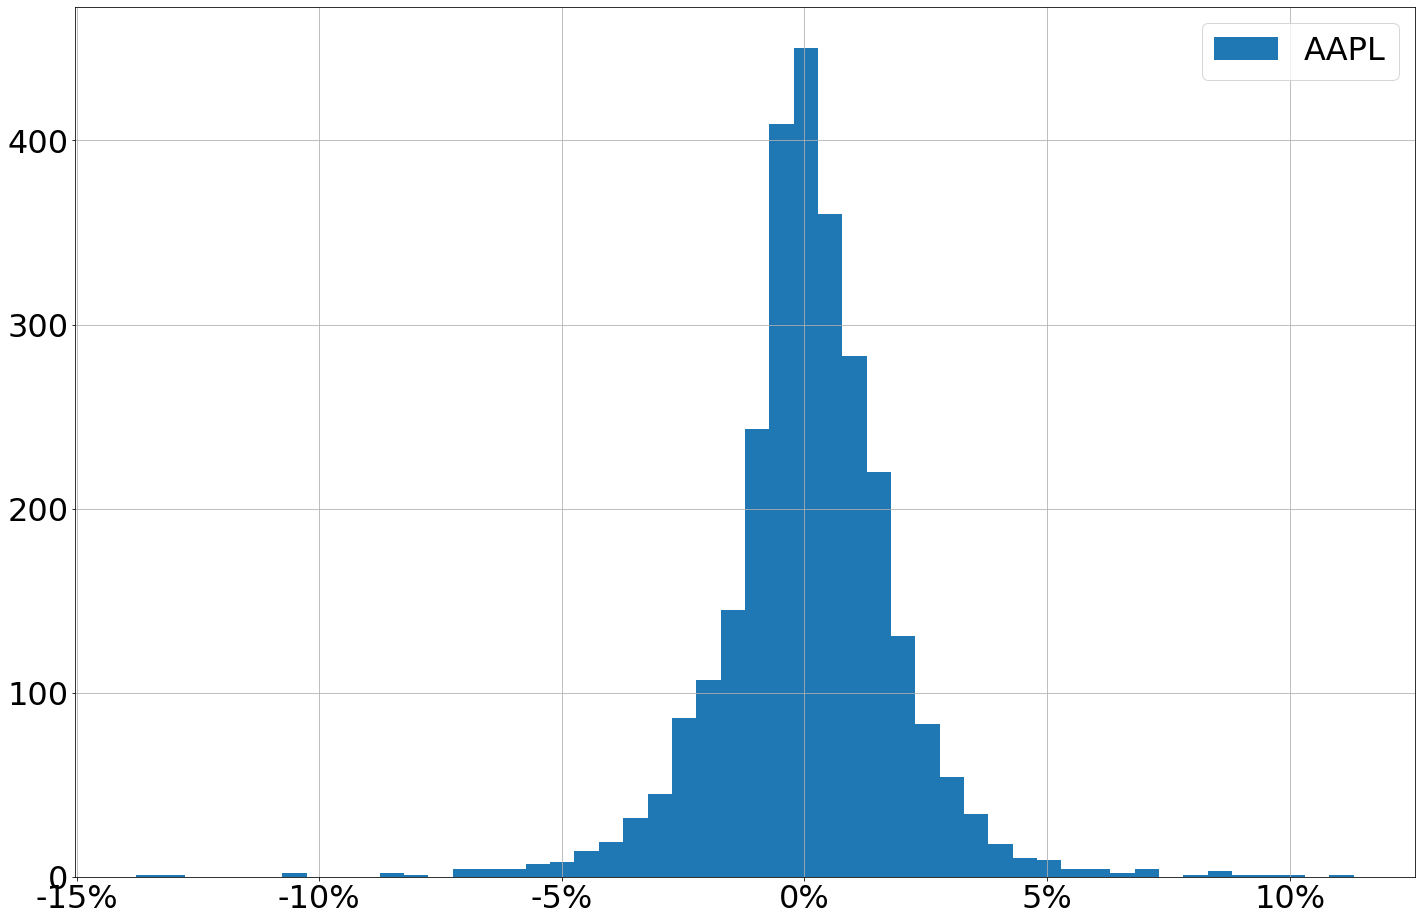

In [15]:
fig, ax = plt.subplots(figsize = (24, 16))
price_change_data["AAPL"].hist(bins = 50, label = "AAPL")
# set horizontal axis values as percent
x_vals = ax.get_xticks()
ax.set_xticklabels([str(int(x))+ "%" for x in x_vals])    
plt.legend()

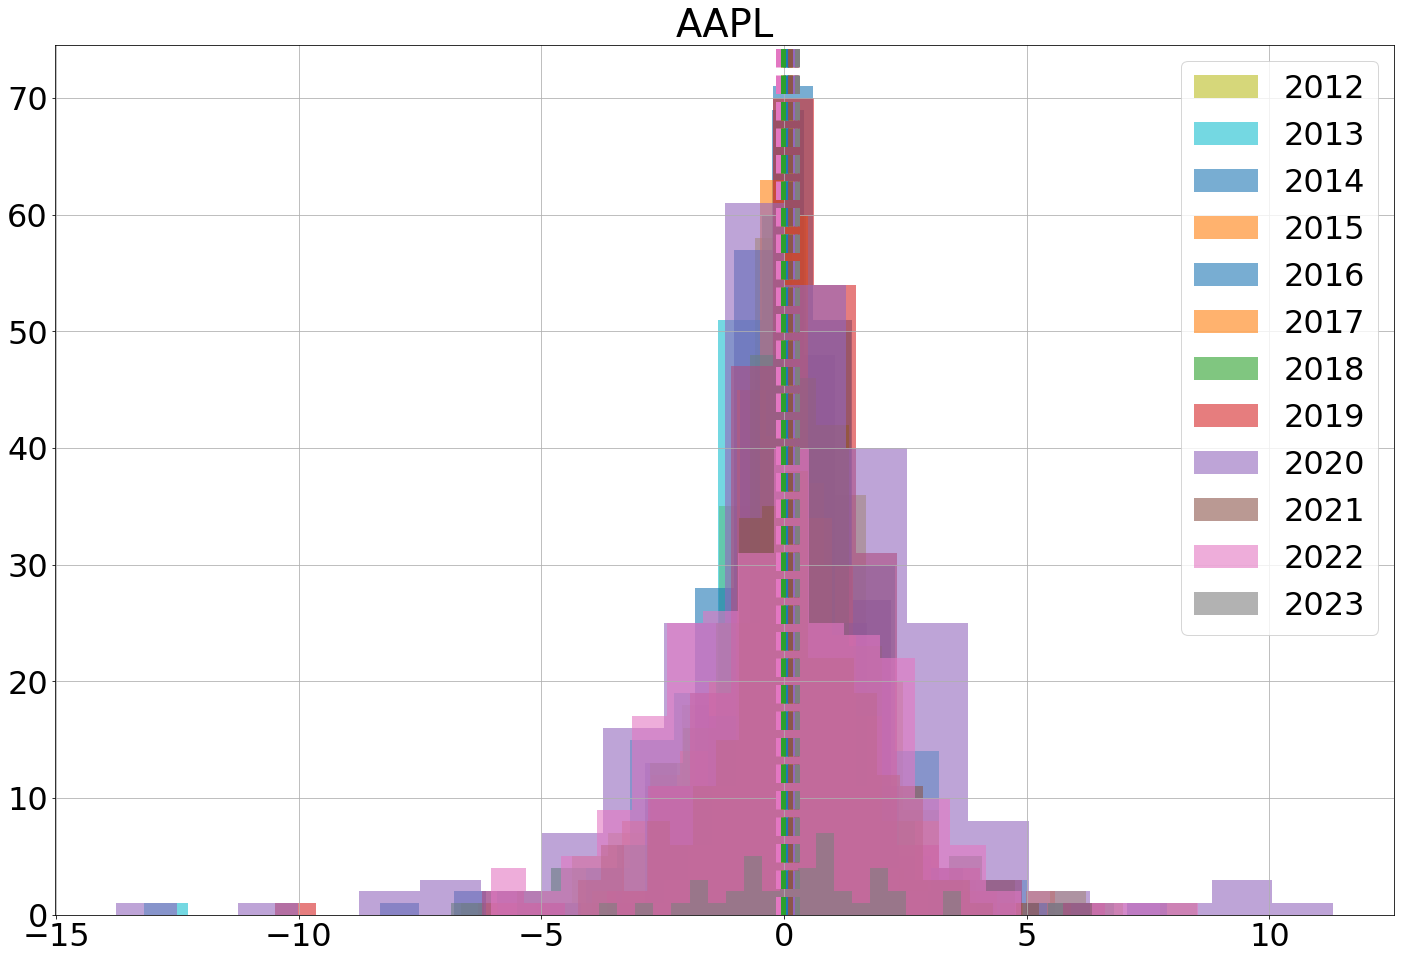

In [16]:
graph_yearly_distributions(price_change_data, "AAPL")

While kurtosis of each distribtion appears to change across time, the mean of changes in the logged value of AAPL is consistently near 0. The data is now in a format that is closer to obeying the the assumption that data is identically distributed. Now we will continue our presentation of all four stocks. 

So far, we have used the vertical axis to indicate the number of observations for a given bin. Instead, we should use the vertical axis to indicate the percentage of observations for a bin when measured in units of standard deviation of the data. To do this, we set the *density* option equal to *True*.

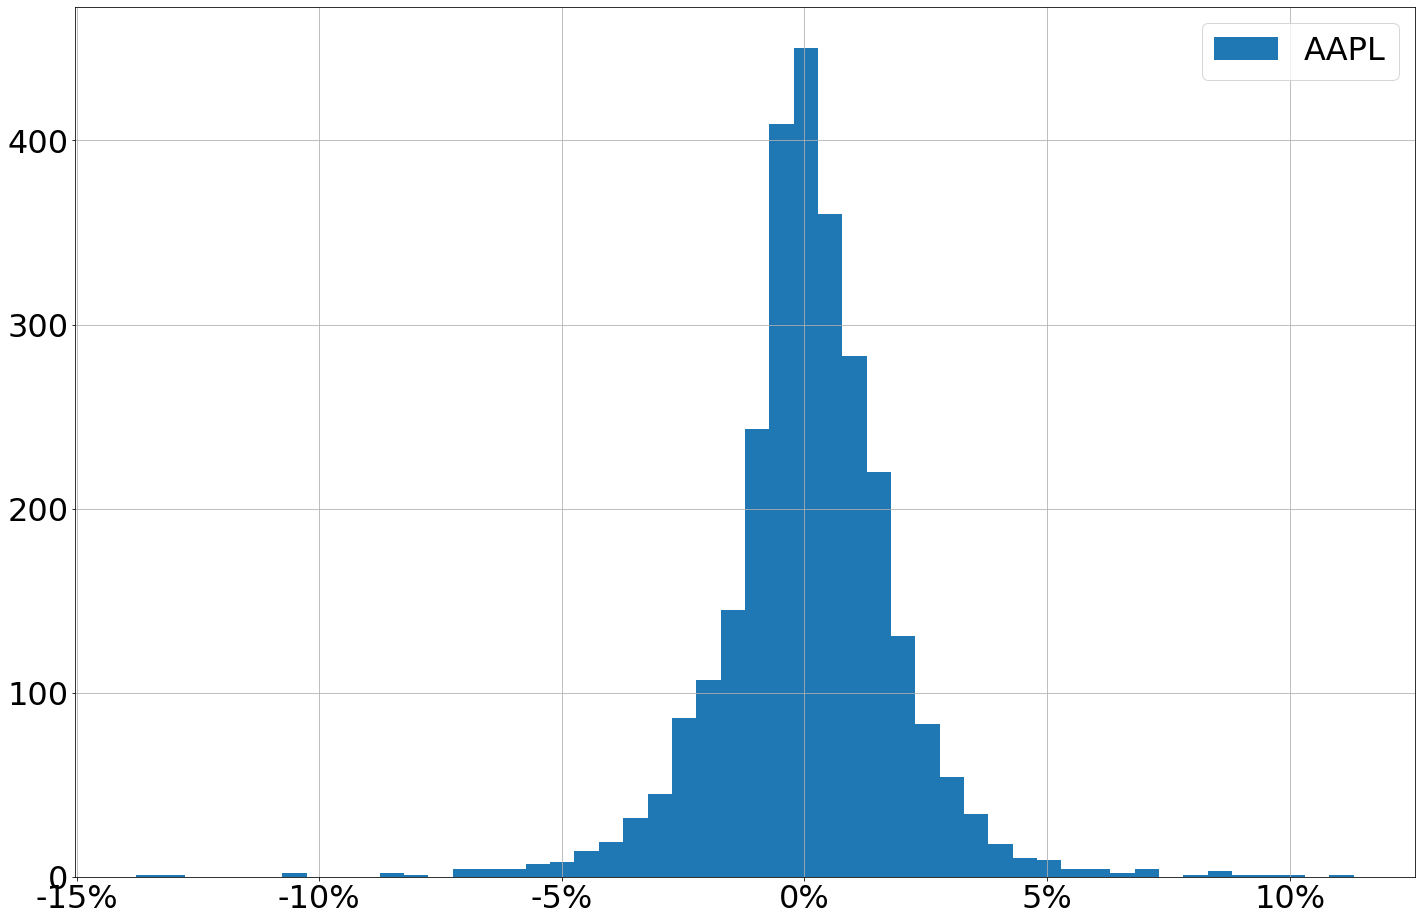

In [17]:
fig, ax = plt.subplots(figsize = (24, 16))
price_change_data["AAPL"].hist(bins = 50, label = "AAPL")
# set horizontal axis values as percent
x_vals = ax.get_xticks()
ax.set_xticklabels([str(int(x))+ "%" for x in x_vals])    
plt.legend()

It will be more interesting if we can compare distributions of these stocks. We can plot these giving each stock its own quadrant.

array([[<AxesSubplot:title={'center':'MSFT'}>,
        <AxesSubplot:title={'center':'AAPL'}>],
       [<AxesSubplot:title={'center':'PG'}>,
        <AxesSubplot:title={'center':'TSLA'}>]], dtype=object)

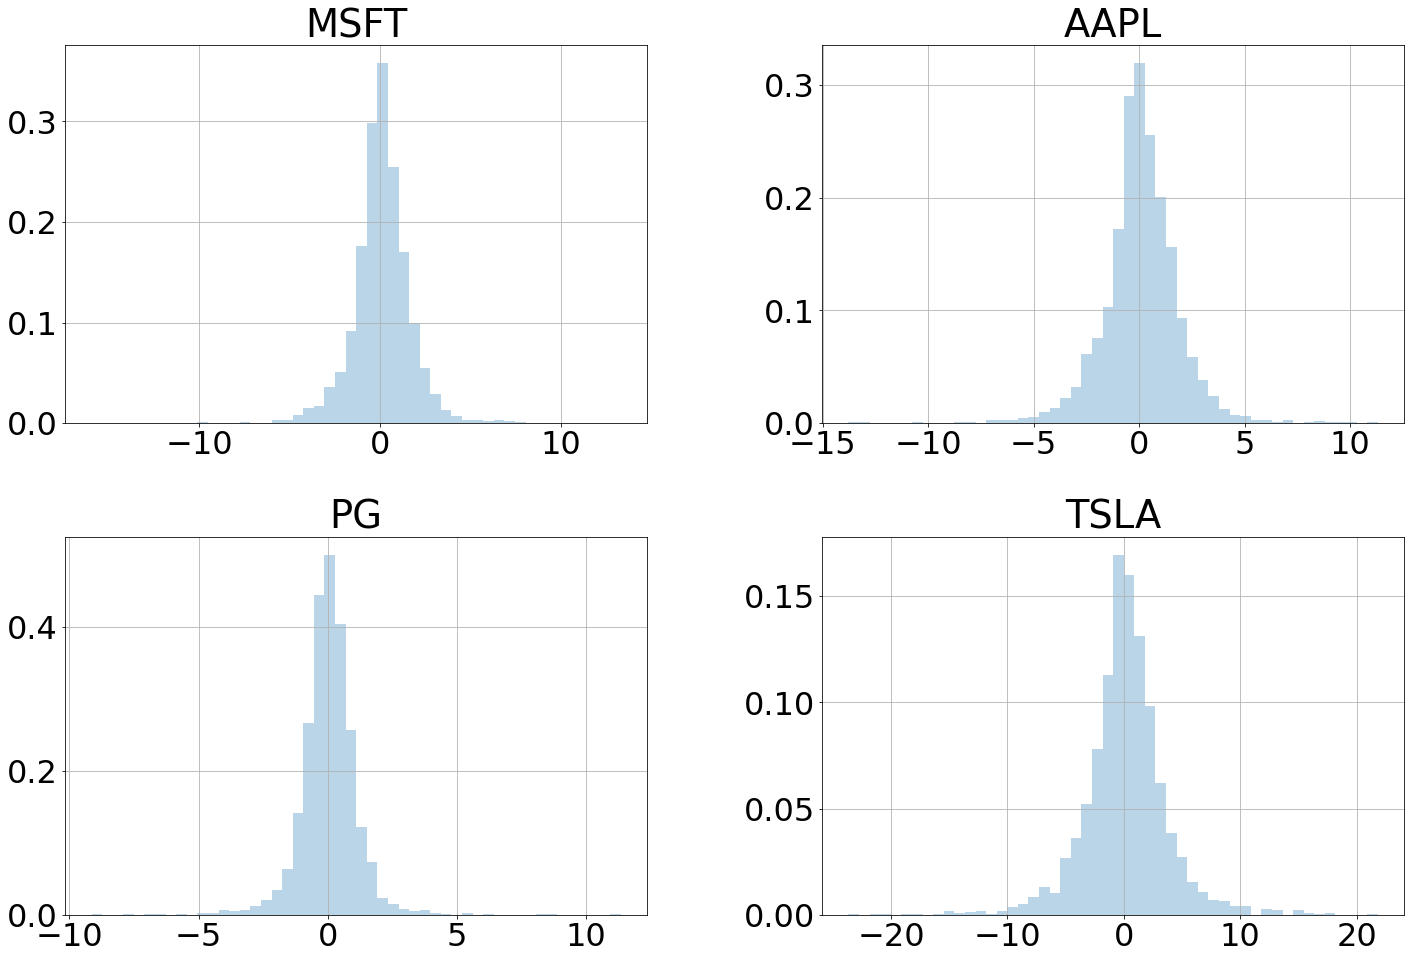

In [18]:
fig, ax = plt.subplots(2,2, figsize = (24,16))
#for key in price_change_data:
price_change_data.hist(bins = 50, 
                       alpha = .3, 
                       label = price_change_data.keys(), 
                       ax = ax, 
                       density = True)

Next, we will calculate statistics for each stock and include these statistics within the plot.

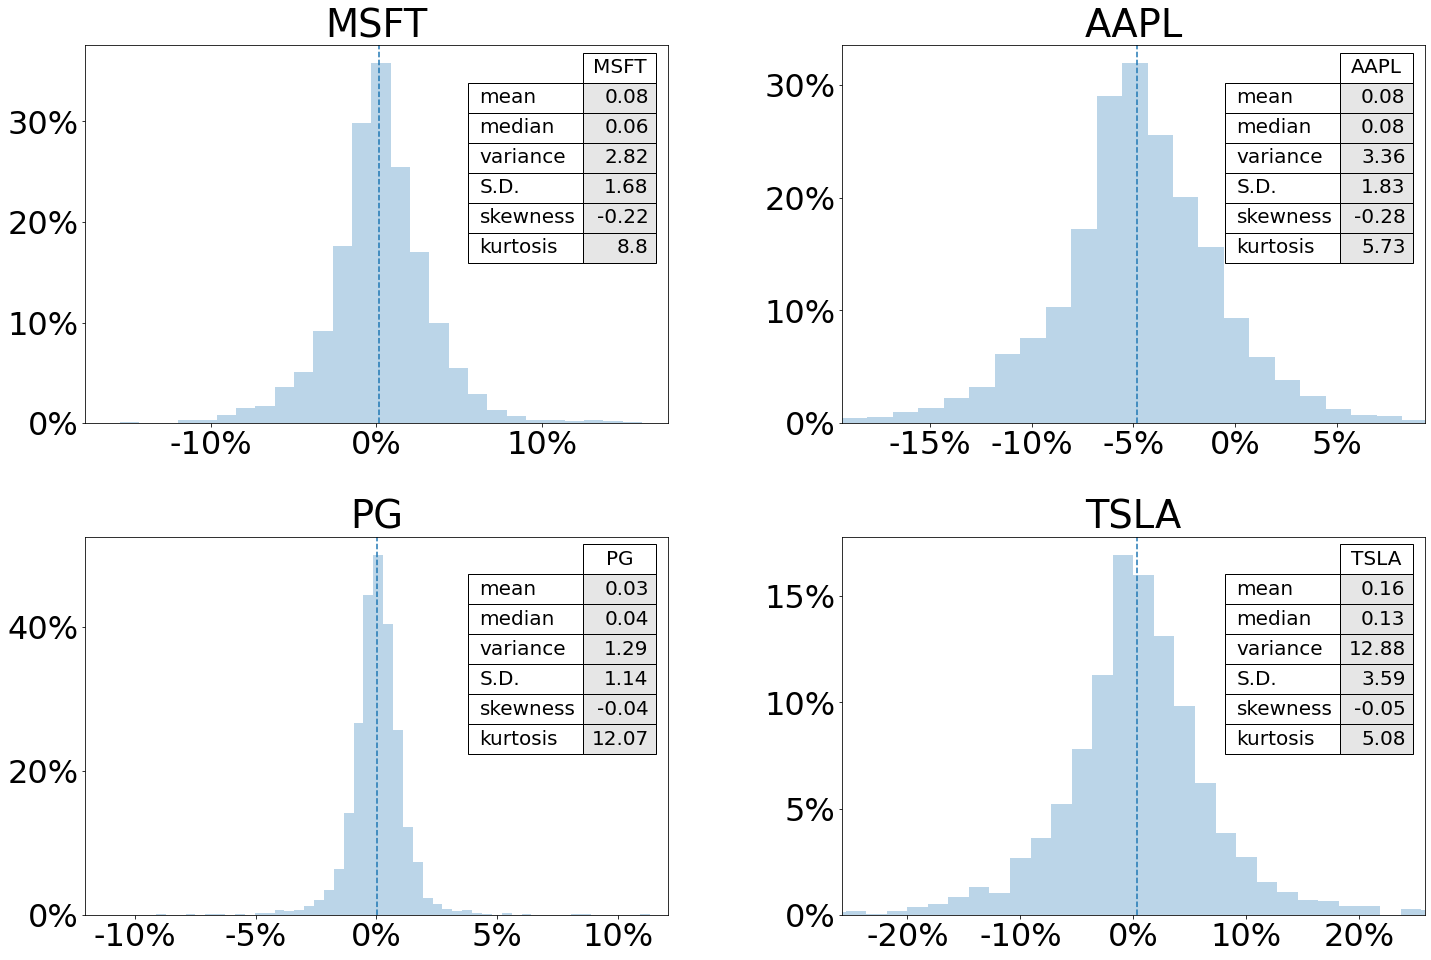

In [19]:
from pandas.plotting import table

fig, ax = plt.subplots(2,2, figsize = (24,16))
#for key in price_change_data:
price_change_data.hist(bins = 50, alpha = .3, label = price_change_data.keys(), ax = ax, density = True)

# plot table with summary statistics
for i in range(len(ax)):
    for j in range(len(ax[i])):
        # select hist plot for each stock
        a = ax[i][j]
        # identify stock
        stock = a.get_title()
        # save summary statistics data
        hist_data = stats_df[stock] 
        # plot summary statistics within the histogram plot
        stats =table(a, hist_data, 
                     colWidths=[.1], 
                     cellColours=[[(.9,.9,.9)]]*6, 
                     loc = "upper right")
        stats.scale(1.25,2.5)
        stats.auto_set_font_size(False)
        stats.set_fontsize(20)
        # mark the mean
        a.axvline(x = hist_data.loc["mean"], ls="--")
        # set horizontal axis values as percent
        x_vals = a.get_xticks()
        a.set_xticklabels([str(int(x))+ "%" for x in x_vals])   
        y_vals = a.get_yticks()
        a.set_yticklabels([str(int(y * 100))+ "%" for y in y_vals]) 
        # Turn of grid lines
        a.grid(False)
        abs_min_x = abs(hist_data.min())
        abs_max_x = abs(hist_data.max())
        min_max = abs_min_x if abs_min_x > abs_max_x else abs_max_x
        a.set_xlim(-1 * min_max, min_max)

   
plt.show()

## Measuring Volatility

### Kurtosis

Notice that kurtosis is actually the largest for PG, followed by Microsoft. This might seems strange since higher kurtosis values tend to indicate fatter tails for a distribution. So why is it that the tamest distribution in terms of the size of  standard deviation has the second highest kurtosis value? Kurtosis measures the fatness of tails relative to a given standard deviation. While the kurtosis of PG may be relatively high, the standard deviation is the smalles amongst all variables. It may be easier to measure the fatness of tails simply by plotting each distribution on the same graph.


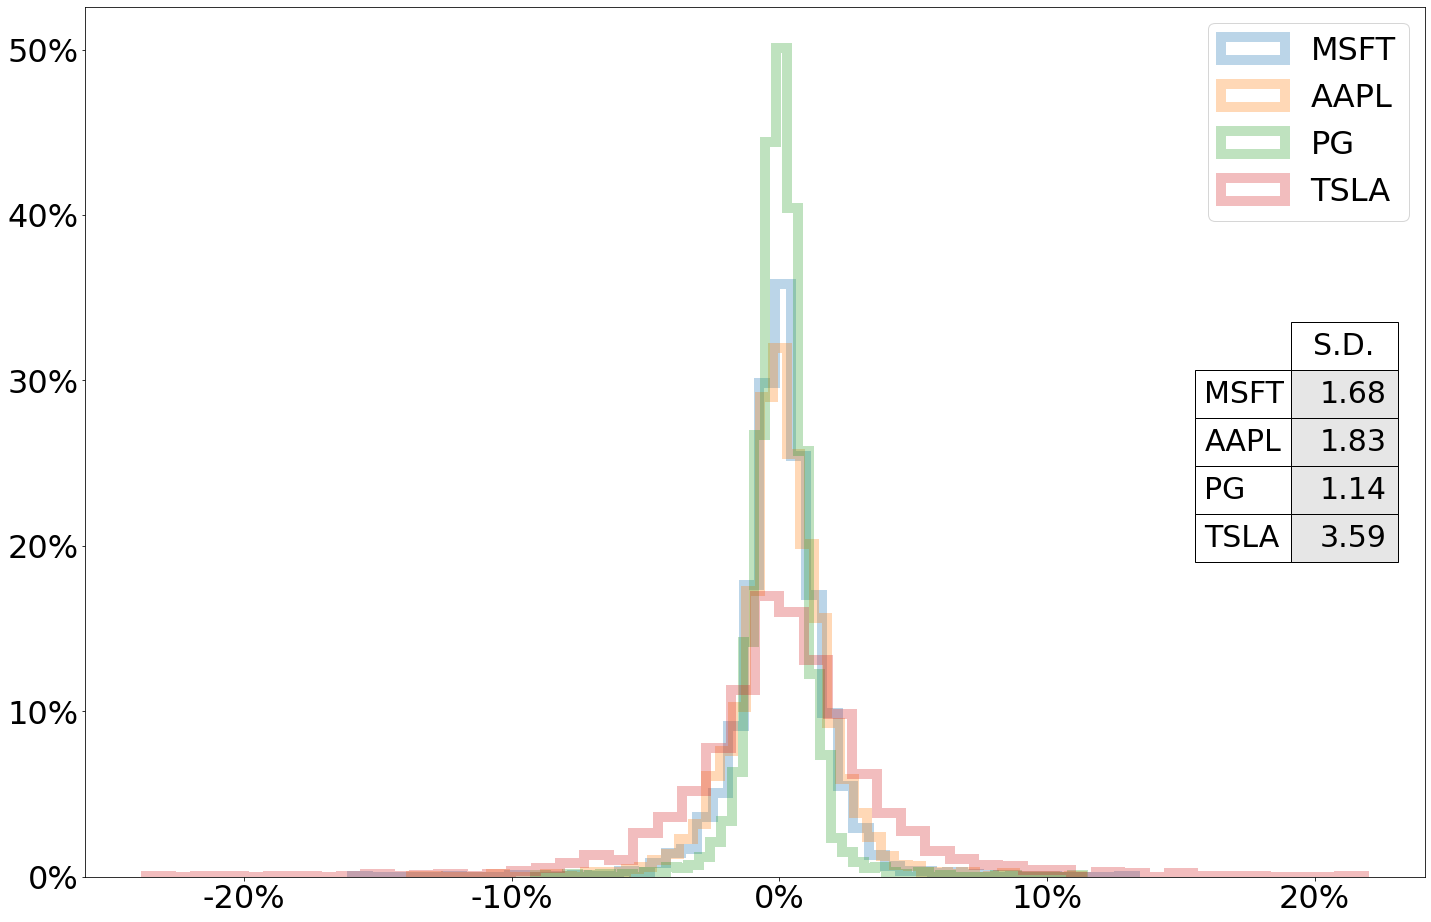

In [20]:
fig, ax = plt.subplots(figsize = (24,16))
for key in price_change_data:
    price_change_data[key].hist(bins = 50, histtype = "step", 
                                alpha = .3, label = key, linewidth = 10, 
                                density = True)
# set horizontal axis values as percent
x_vals = ax.get_xticks()
ax.set_xticklabels([str(int(x))+ "%" for x in x_vals])    
# set vertical axis values as percent
y_vals = ax.get_yticks()
ax.set_yticklabels([str(int(y * 100))+ "%" for y in y_vals]) 
# Include a table with the standard deviation of each stock
stats =table(ax, stats_df.loc["S.D."], colWidths=[.1], 
             cellColours=[[(.9,.9,.9)]]*4, loc = "center right")
stats.scale(.8,4)
stats.auto_set_font_size(False)
stats.set_fontsize(30)
ax.grid(False)

plt.legend()

If you prefer, you can fill the space below the curves to indicate the area under each curve. This makes it difficult to see the "AAPL", but it is especially useful if you would like to compare only 2 or 3 distributions. If we fill the area under each curve with the relevant color, then it is a bit easier to observe which distributions have the greatest volatility.

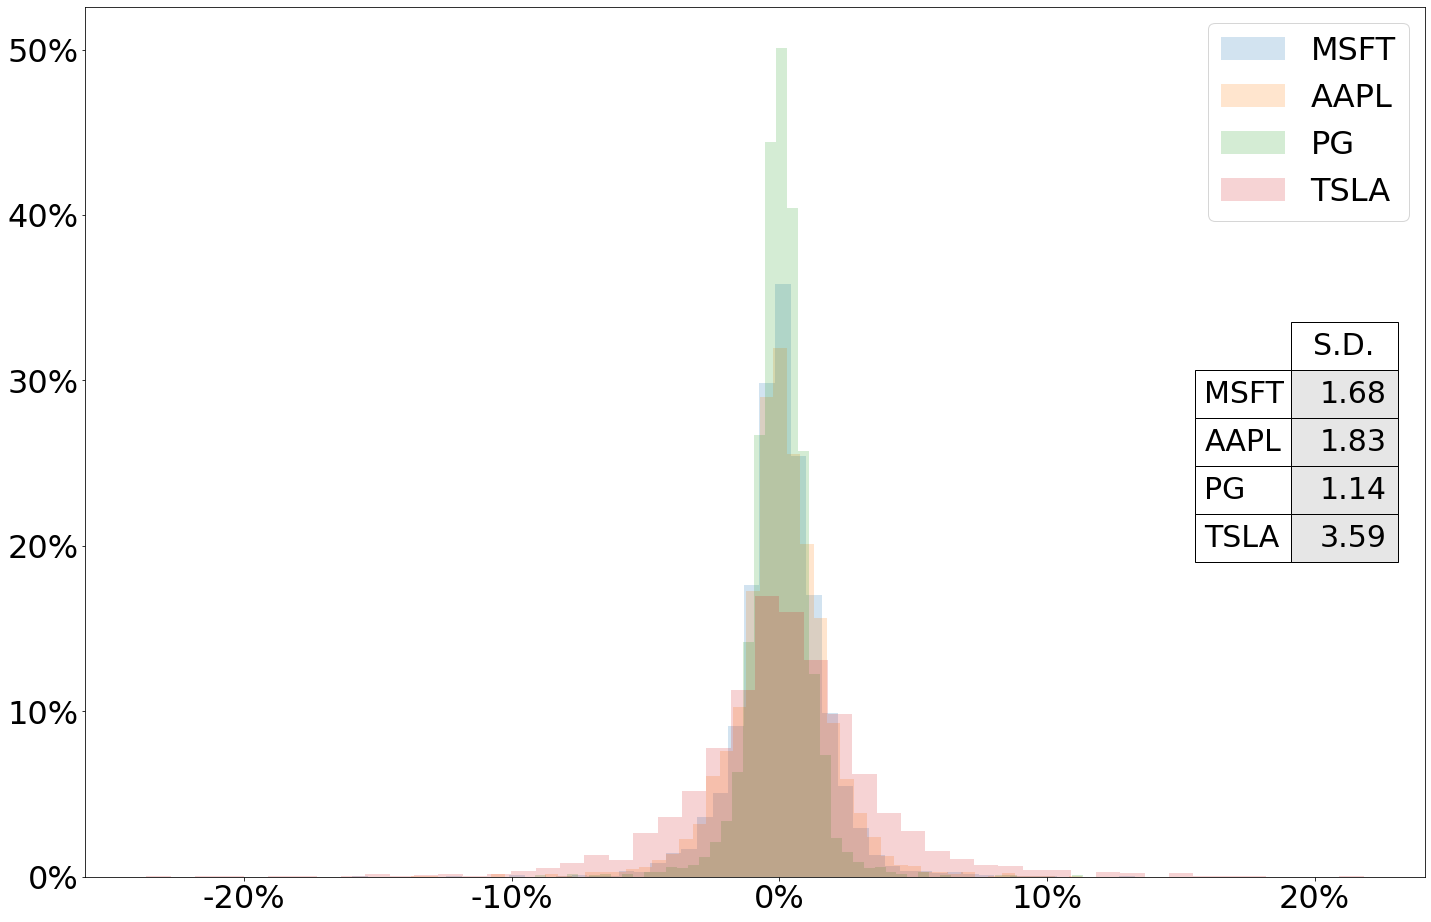

In [21]:
fig, ax = plt.subplots(figsize = (24,16))
for key in price_change_data:
    price_change_data[key].hist(bins = 50, alpha = .2, label = key, 
                                density = True)
# set horizontal axis values as percent
x_vals = ax.get_xticks()
ax.set_xticklabels([str(int(x))+ "%" for x in x_vals])    
# set vertical axis values as percent
y_vals = ax.get_yticks()
ax.set_yticklabels([str(int(y * 100))+ "%" for y in y_vals])
# Include a table with the standard deviation of each stock
stats =table(ax, stats_df.loc["S.D."], colWidths=[.1], cellColours=[[(.9,.9,.9)]]*4, loc = "center right")
stats.scale(.8,4)
stats.auto_set_font_size(False)
stats.set_fontsize(30)
ax.grid(False)

plt.legend()

Although these distributions are clearly different, a most fascinating outcome is generated when we control for the size of the standard deviation of each distribution. If we divide all price changes in a distribution by the standard deviation of that distribution, the resultant distributions are nearly identical.

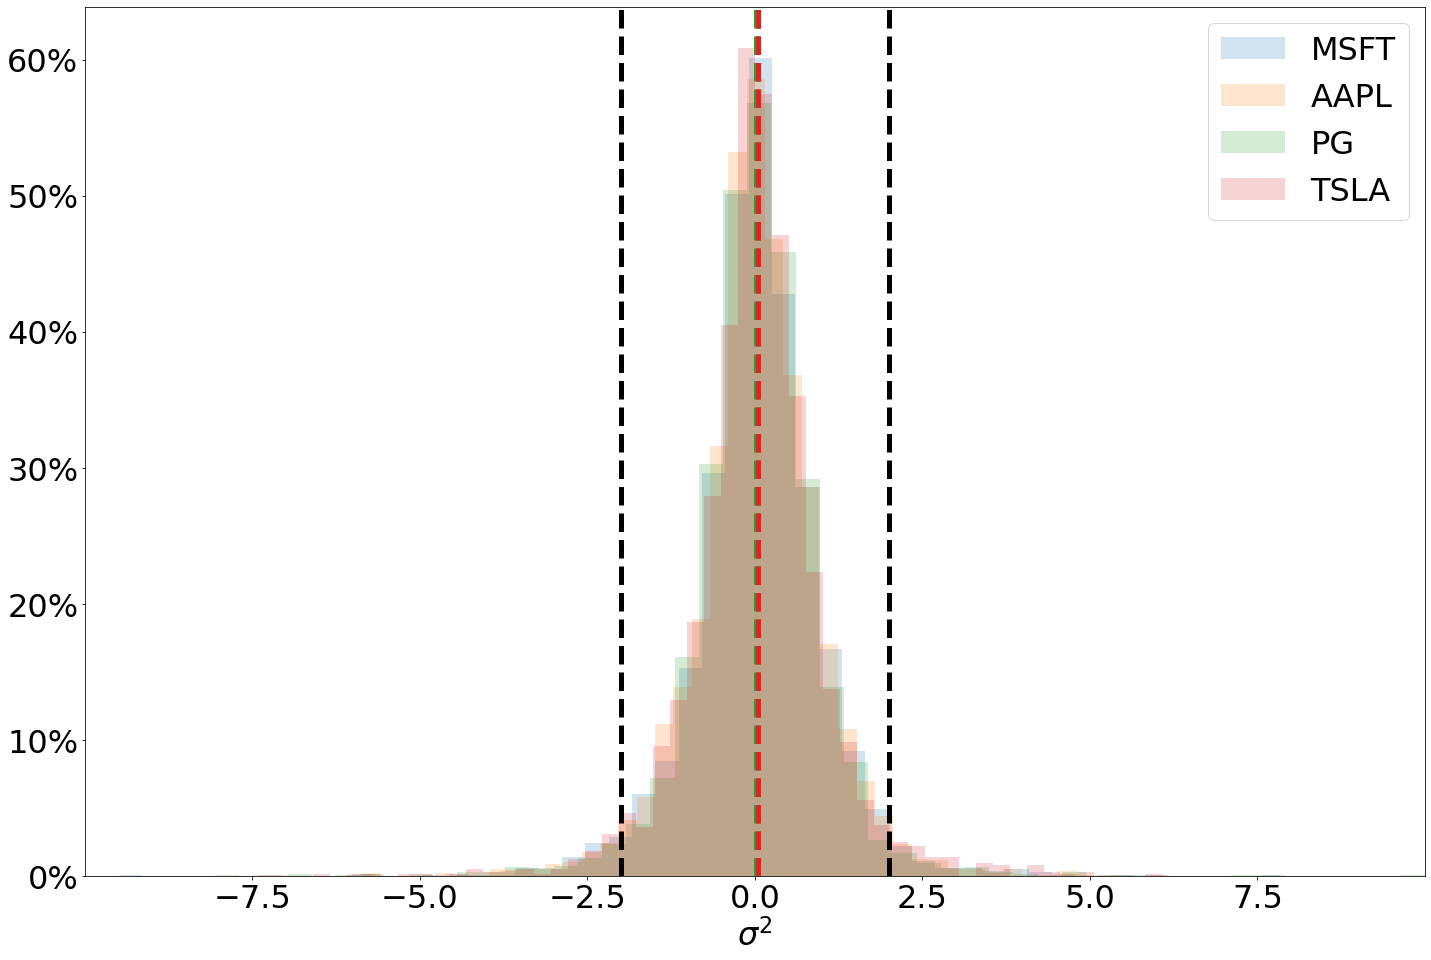

In [22]:
fig, ax = plt.subplots(figsize = (24,16))

 
plot_data = price_change_data.div(price_change_data.std())[stocks]
for i in range(len(plot_data.keys())):
    key = list(plot_data.keys())[i]
    val = plot_data[key].dropna()
    color = "C" + str(i)
    val.hist(bins = 50, 
             alpha = .2, 
             label = key,
             density = True,
             color = color,
             ax = ax)
    ax.axvline(val.mean(), 
               linewidth = 5, 
               ls = "--", 
               color = color)
# set horizontal axis values as percent
x_vals = ax.get_xticks()
ax.axvline(-2, linewidth = 5, ls = "--", color = "k")
ax.axvline(2, linewidth = 5, ls = "--", color = "k")

# set vertical axis values as percent
y_vals = ax.get_yticks()
ax.set_yticklabels([str(int(y * 100))+ "%" for y in y_vals])
# Include a table with the standard deviation of each stock
ax.grid(False)
abs_min_x = abs(plot_data.min().min())
abs_max_x = abs(plot_data.max().max())
min_max = abs_min_x if abs_min_x > abs_max_x else abs_max_x
ax.set_xlim(-1 * min_max, min_max)
ax.set_xlabel("$\\sigma^2$")
plt.legend()

### $\beta$ and Volatility

By plotting distributions of specific stocks, we have casually shown that TSLA is relatively volatile compared to PG, MSFT, and AAPL. Yet, how would we compare this volatility to the *average* volatility in the market? In finance, the relative volatility of a stock is referred to as it's $\beta$ (_beta_). $\beta$ is unique for each security in a portfolio. It is a weight that describes the sensitivity of that security to market changes. $\beta$ is generally found using past market data, where average market performance is indicated by the S&P500.A $\beta$ for a given security, $i$, can be found by taking the ratio of the covariance between the returns from that security and the market returns, and the variance of the market returns. This will quantify relative volatility of a security: 
<h3 align="center">
    <font size="5">
        $ \beta_i = \frac{Cov(r_i,r_m)}{Var(r_m)}$
    </font>
</h3>

Let's add the S&P500 to our list of stocks and compare the distribution of changes in each stock to the S&P500. We will save the list of stocks before adding the S&P500 to aid the next part of this exercise.

In [23]:
stocks = list(price_change_data.keys())
price_change_data["S&P500"] = web.get_data_yahoo('^GSPC', 
                       start,
                       end)["Adj Close"]
price_change_data["S&P500"] = np.log(price_change_data["S&P500"]).diff().mul(100)
price_change_data.head()

[*********************100%***********************]  1 of 1 completed


,MSFT,AAPL,PG,TSLA,S&P500
Date,,,,,
2012-01-03,NaN,NaN,NaN,NaN,NaN
2012-01-04,2.326112,0.535969,-0.044898,-1.326441,0.018791
2012-01-05,1.016714,1.104083,-0.420052,-2.152171,0.293939
2012-01-06,1.541526,1.039955,-0.240813,-0.777346,-0.254019
2012-01-09,-1.325000,-0.158744,0.421051,1.255570,0.225904


In [24]:
import matplotlib.ticker as mtick

We can calculate the beta values using the variance and covariance functions tha we created at the start of this lesson. Let's perform this calculation for each stock.

In [25]:
def calculate_beta(data, stock_key, market_key):
    df = data[[stock_key, market_key]].dropna()
    stock_cov = covariance(df[stock_key], df[market_key], sample = True) 
    stock_var = variance(df[market_key], sample = True)
    beta = stock_cov / stock_var
    
    return beta
    
betas = {}

for stock in stocks:
    betas[stock] = calculate_beta(price_change_data, stock, "S&P500")
pd.DataFrame(betas, index = ["$\\beta$"]).T

,$\beta$
MSFT,1.192264
AAPL,1.174666
PG,0.583715
TSLA,1.444107


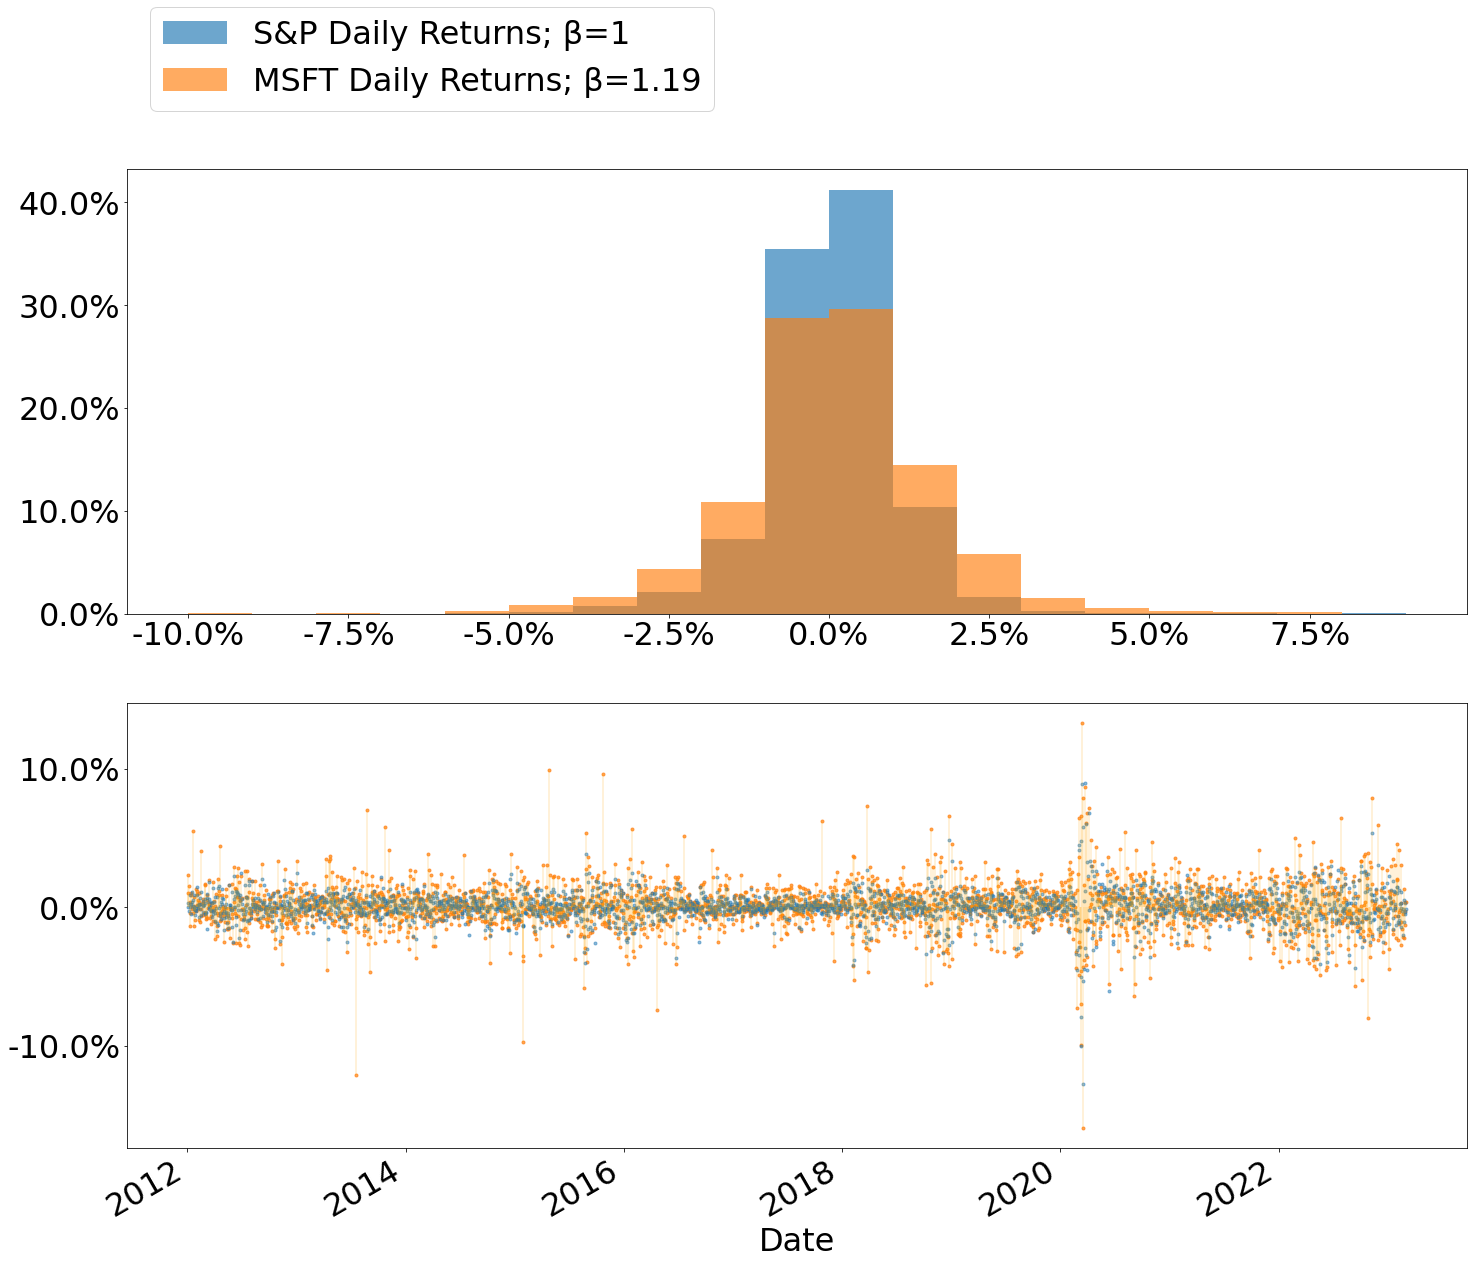

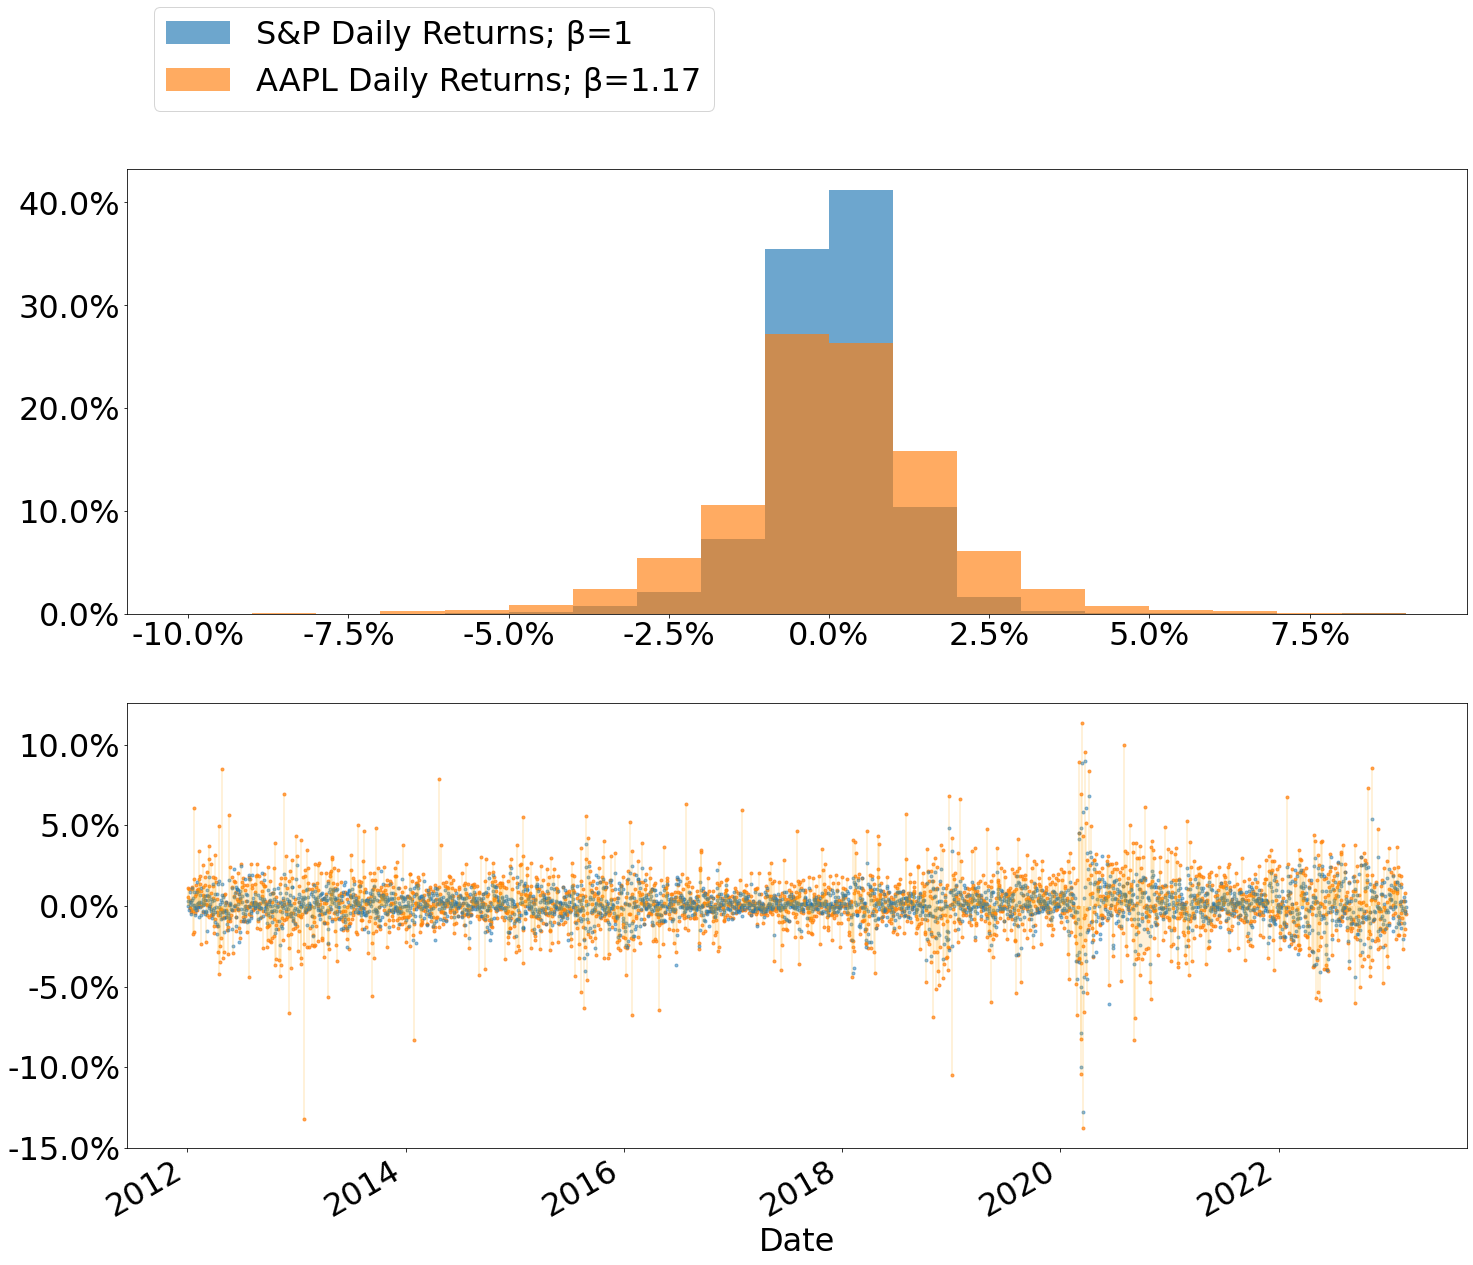

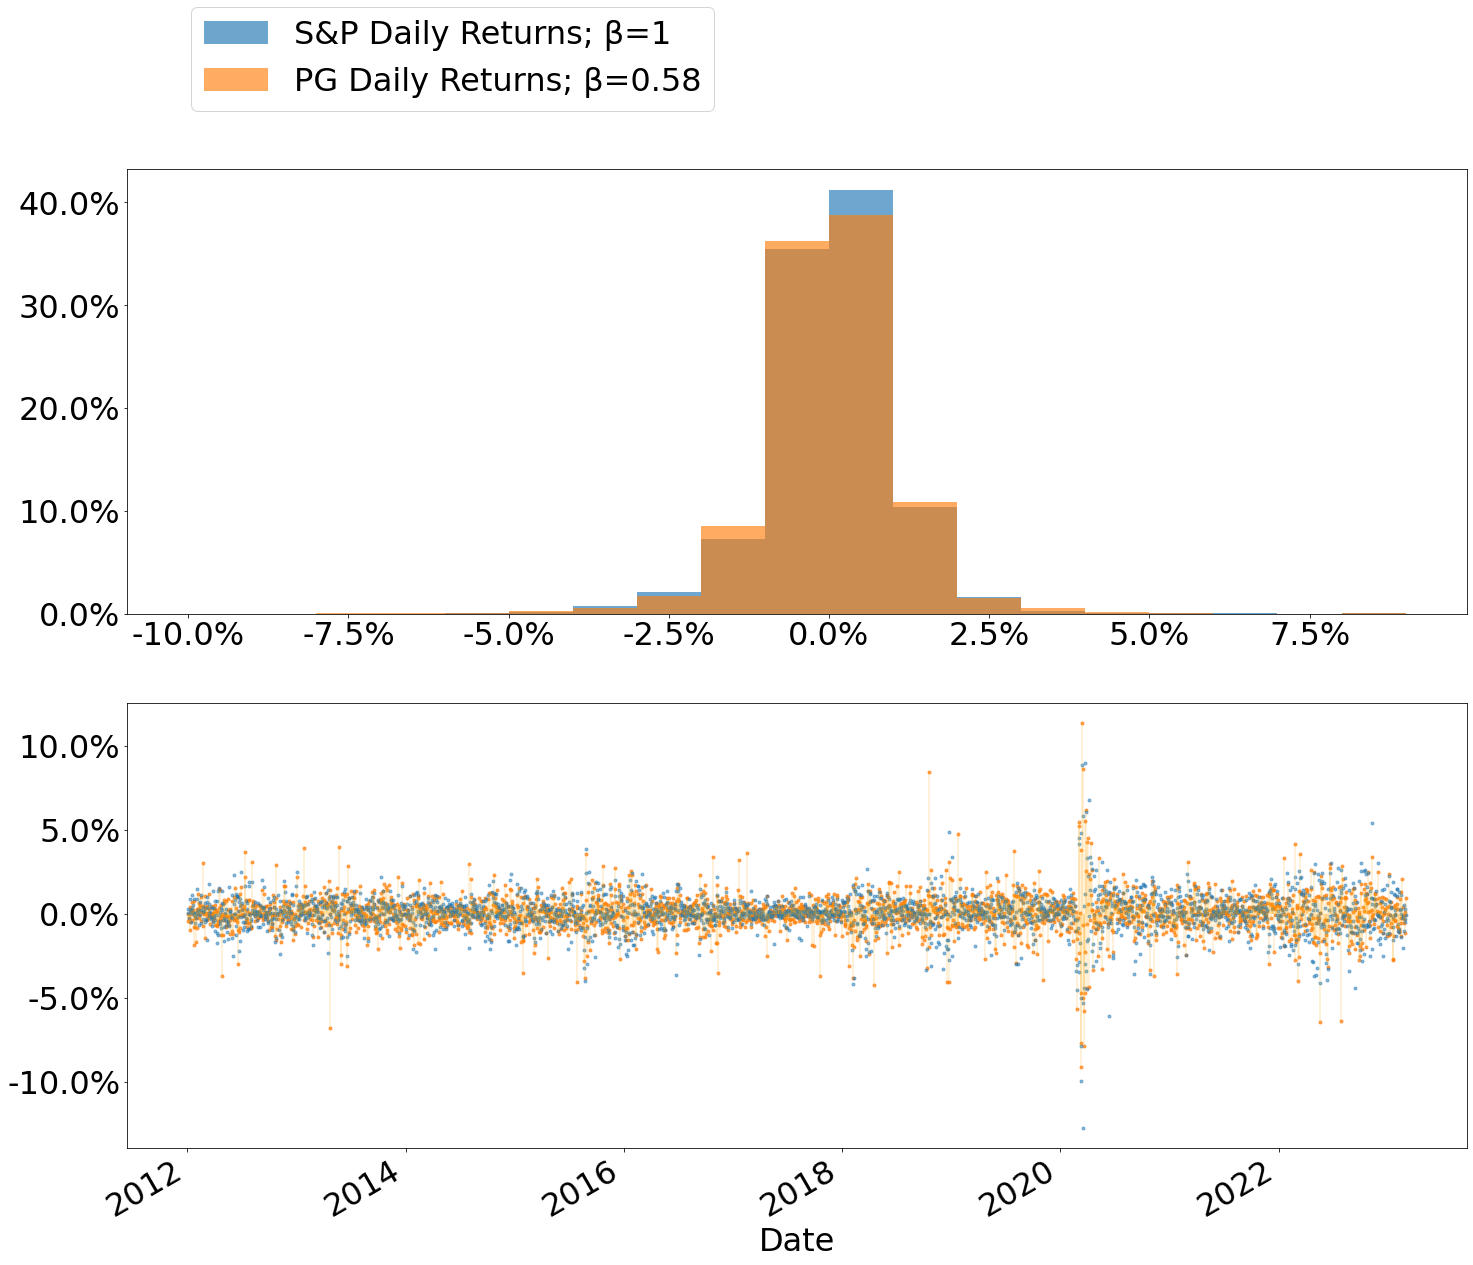

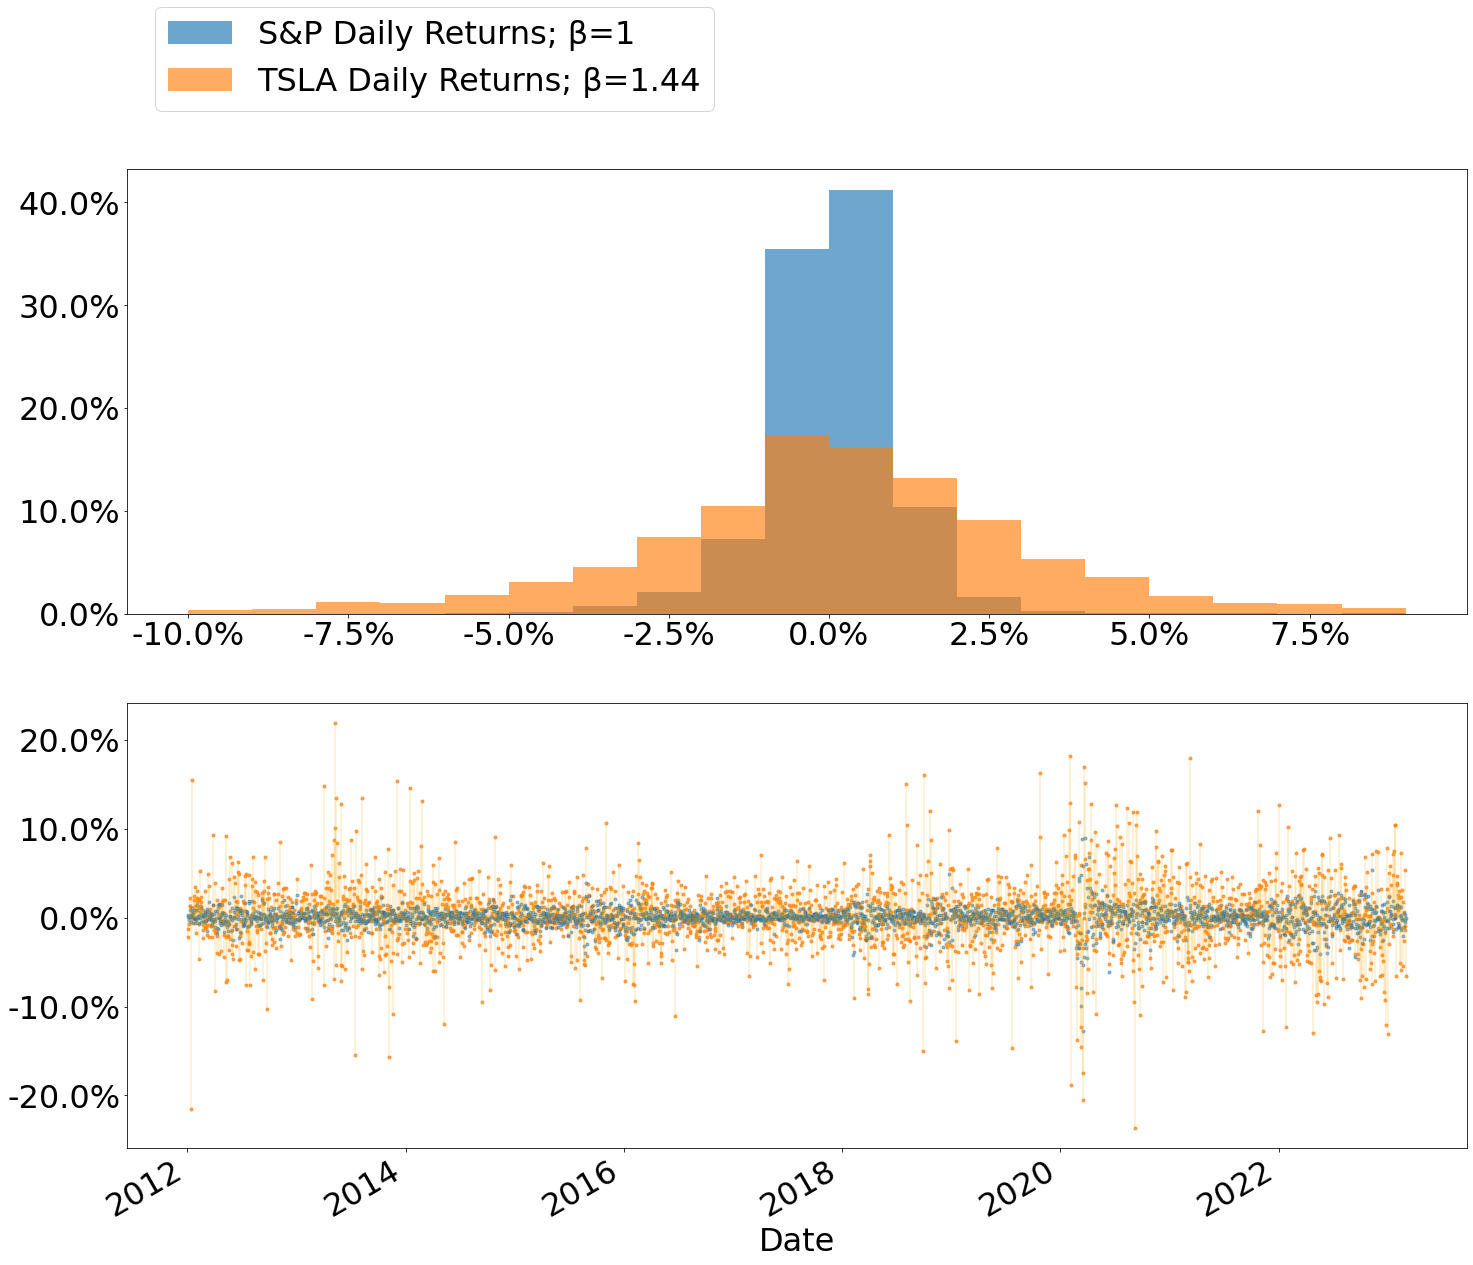

In [26]:
for stock in stocks:
    fig, ax = plt.subplots(2,1, figsize=(24,20))

    price_change_data["S&P500"].hist(bins=[i for i in range(-10, 10,1)],
                      label= "S&P Daily Returns; β="+str(1),
                      ax=ax[0],
                      density=True,
                      grid=False,
                      alpha=.65)
    price_change_data[stock].hist(bins=[i for i in range(-10, 10,1)],
                   label= stock + " Daily Returns; β="+str(betas[stock].round(2)),
                   ax=ax[0],
                   density=True,
                   grid=False,
                   alpha=.65)    

    ax[0].legend(bbox_to_anchor = (.45,1.4))
    ax[0].set_xticklabels([str(x) + "%" for x in ax[0].get_xticks()])
    ax[0].set_yticklabels([str(round(y * 100,2)) + "%" for y in ax[0].get_yticks()])
    
    price_change_data[stock].plot(linestyle='',
                  marker='o',
                  alpha=.7,
                  ms=3,
                  label= stock + " Weekly Returns",
                  c="C1",
                ax = ax[1])
    price_change_data["S&P500"].plot(linestyle='',
                  marker='o',
                  alpha=.5,
                  ms=3,
                  label= "S&P500 Weekly Returns",
                  c="C0",
                ax = ax[1])

    ax[1].vlines(price_change_data.index, 0, price_change_data[stock].values, lw=0.3, color='orange')
    ax[1].set_yticklabels([str(y) + "%" for y in ax[1].get_yticks()])

    
#     ax.set_xbound(lower = -.2, upper = .2)

### Central Limit Theorem:

If $\bar{X}$ is the mean of a random sample of size $n$ taken
from a population with mean $\mu$ and finite variance $\sigma^2$, then the limiting form of
the distribution of
<h3 align="center">
    <font size="5">
        $ z = \frac{\bar{X} - \mu}{\frac{\sigma}{\sqrt{n}}}$
    </font>
</h3>

 as $\lim_{n \to \infty}$, is the *standard normal distribution* 
 
 The power of the CLT is that this holds no matter the type of distribution we are sampling from. So, for instance, if we took $30$ random samples from a lognormal distribution, the means of the samples would be normally distributed. 
 
 The Z-value tells us: what is the probability that a given sample mean would occur given the sample size and population mean? As n gets larger, the mean is expected to get more accurate if it does follow the population mean $\mu$
 
The gotten _z-score_ tells us how many standard deviations our sample mean $\bar{X}$ is from our population mean $\mu$.
 
 The normal approximation for $\bar{X}$ will generally be good if $n ≥ 30$, provided the population distribution is not terribly skewed. If $n < 30$, the approximation is good only if the population is not too different from a normal distribution and, as stated above, if the population is known to be normal, the sampling distribution of $\bar{X}$ will follow a normal distribution exactly, no matter how small the size of the samples.
 
We also choose the size of the sample, $n$, we want to take from the distributions. $30$ would be sufficient but we will use distributions with $100$ observations. We will draw $1000$ means to observe the mean value theorem visually. 

In [27]:
from matplotlib.animation import FuncAnimation as animation
from IPython import display
# number of simulations
n = 100
m = 1000

we create a dictionary with the type of distribution we are drawing from and the averages of the random samples we take from the distributions. 

In [28]:
# In each simulation, there is one trial more than the previous simulation
dist_avgs = {"Die Rolls":[],
            "Poisson":[], 
            "Lognormal": []}

for i in range(m):
    dist_avgs["Die Rolls"].append(np.average(np.random.randint(1,7,n))) 
    dist_avgs["Poisson"].append(np.average(np.random.poisson(1, n)))
    dist_avgs["Lognormal"].append(np.average(np.random.lognormal(0, 1, n)))
dist_avgs = pd.DataFrame(dist_avgs)
dist_avgs

,Die Rolls,Poisson,Lognormal
0,3.35,1.01,1.553289
1,3.55,1.03,1.951848
2,3.43,0.97,1.494489
3,3.37,1.08,1.572646
4,3.24,0.85,1.208450
...,...,...,...
995,3.51,1.01,1.462229
996,3.57,1.12,1.732940
997,3.42,1.06,1.583036
998,3.98,0.98,1.692798


We now have a set of sample means of size $1000$ from three different distributions. We can plot the final product of these to show that each of these sets follow a normal distribution, even though the distributions from which the means were drawn are not themselves normal. 

The data we will be plotting will be the random sample's mean's deviations from their own mean so that each distribution is centered on zero. So, If the average of the means was $3.5$ for the die rolls, and one sample had a mean of $3.7$, we would margnially increase the bar at $x=0.2$ to account for the observation.

In [29]:
means_df = pd.DataFrame()
sd_df = pd.DataFrame()
# make it so that the means_df dictionary holds each distributions deviations from its own mean,
# this will center each distribution at zero. 
for key in dist_avgs:
    means_df[key] = dist_avgs[key] - dist_avgs.mean()[key]
    # means_df is centered, but the distributions have not been regularized by standard deviation, which is 
    # what the t-test does. So, we must divide the centered means by their standard deviations
    sd_df[key] = means_df[key] / means_df.std()[key] 

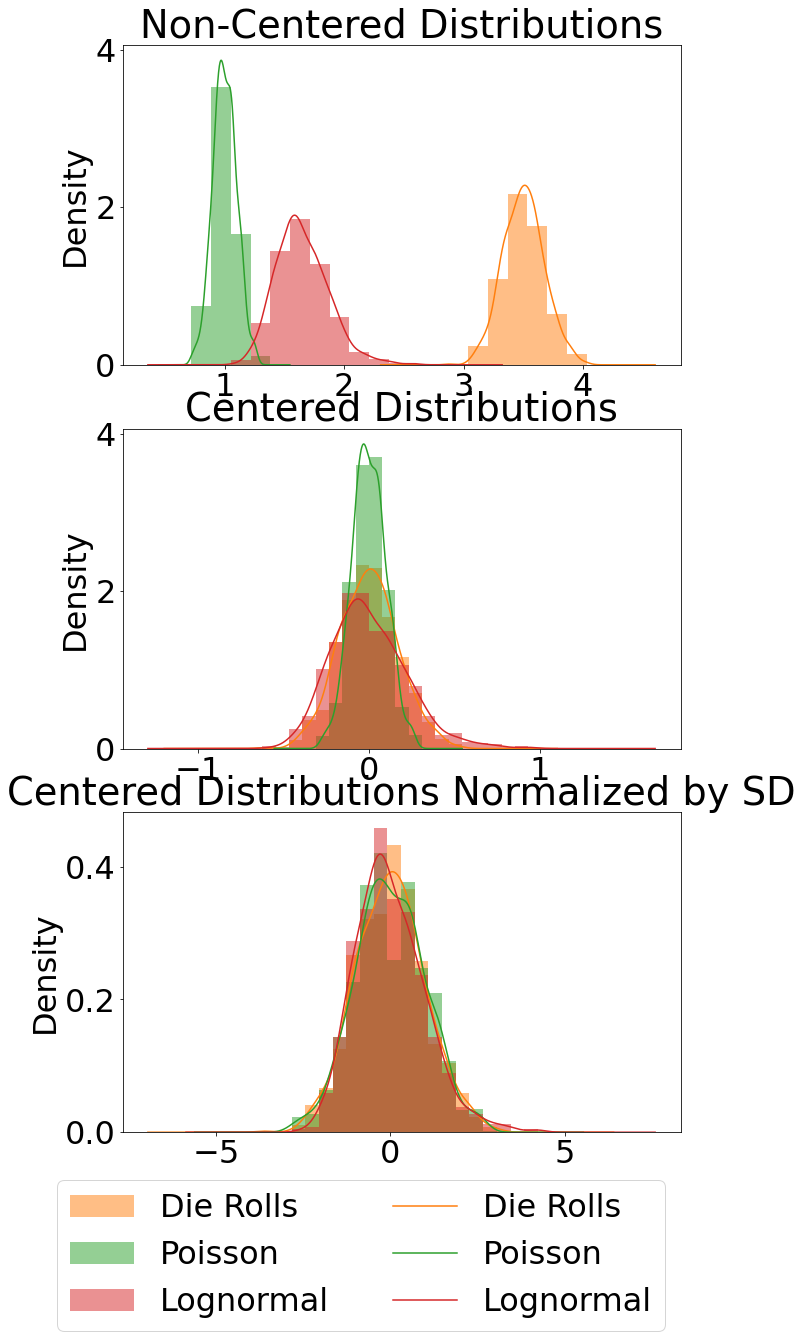

In [30]:
fig, axs = plt.subplots(3, figsize=(10, 20))

# first, plot the dataframe containing the distributions of the random sample means 
dist_avgs.plot.hist(density=True,
                    ax=axs[0],
                    bins=20,
                    color=["C1", "C2", "C3"],
                    alpha=.5,
                   legend = False)
dist_avgs.plot.kde(ax=axs[0], color=["C1", "C2", "C3"], legend=False)
axs[0].set_title("Non-Centered Distributions")



# next, plot the distributions which have been centered at zero
means_df.plot.hist(density=True,
                ax=axs[1],
                bins=20,
                color=["C1", "C2", "C3"],
                alpha=.5,
                  legend = False)
means_df.plot.kde(ax=axs[1], color=["C1", "C2", "C3"], legend=False)
axs[1].set_title("Centered Distributions")

# finally, plot the distributions centered at zero and normalized for standard deviation
sd_df.plot.hist(density=True,
                ax=axs[2],
                bins=20,
                color=["C1", "C2", "C3"],
                alpha=.5,
               legend = False)
sd_df.plot.kde(ax=axs[2], color=["C1", "C2", "C3"], legend=False)
axs[2].set_title("Centered Distributions Normalized by SD")
axs[2].legend(bbox_to_anchor = (1,-.1), ncol = 2)

plt.show()


### Live Visualizations

Sometimes, it can be useful to provide a data visualization that changes. This can be a video (.mp4 file) or a GIF. The power of live visualizations is that they can show change in data in intuitive ways. For this example, we will be creating a live visualization of the Central Limit Theorem. We will show that means of samples pulled from dice rolls will approach the standard normal distribution as the number of samples increases. The live visualization enforces the idea that no matter which distribution the samples are drawn from, the set of their means will approach a standard normal distribution. 

We will need to use the Ipython display library to allow us to display the visualization as a GIF. 

We create a function that, for each index in our dataframe holding the means of our samples, plots each of the means that have come up to that index. So it will only be one single bin right away, and then two, and so on. Eventually, we will see that a collection of means drawn from any distribution eventually takes the shape of a normal distribution, if n is high enough. 

The FuncAnimation class from matplotlib essentially takes a function that you create(producing a plot in our case) and runs it many times, displaying the results in quick succession, to give the appearance of a live visualization. 

We will create a function, clt(), which plots the distribution only up to the current index in our sample means dictionary. It does $1000$ times, so the first time it iterates there will be a single data point plotted, and the final time it iterates there will be $1000$ data points plotted. 

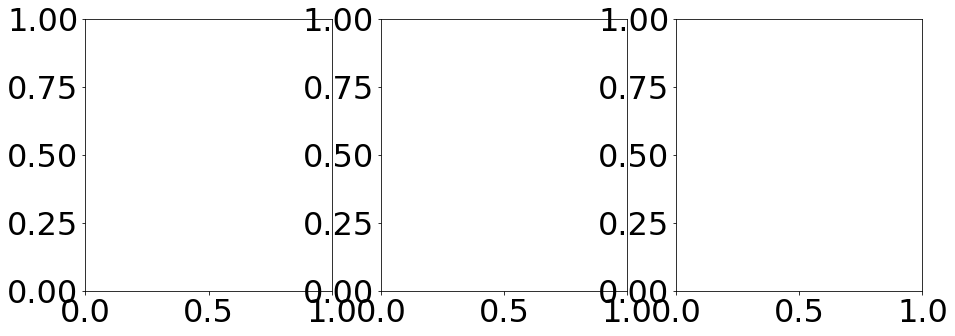

In [31]:
# %matplotlib notebook
# Function that will plot the histogram, where current is the latest figure
def clt(current, *kwargs):
    # if animation is at the last frame, stop it
    if current == m:
        a.event_source.stop()

    for i in range(len(dist_avgs.keys())):
        ax[i].clear()
        dist = list(dist_avgs.keys())[i]
        sd_df[dist].iloc[:current].plot.hist(density = True,
                                                 color = "C" + str(i),
                                             bins= 20,#int(current/10 + 1),
                                             ax = ax[i])
#         ax[i].hist(dist_avgs[dist][0:current], bins= int(current/10 + 1))
        title = dist+'\n# Samples = {}'
        ax[i].set_title(title.format(current), fontsize = 18)
        ax[i].set_xlabel(xlabel, fontsize = 18)
        if i == 0:
            ax[i].set_ylabel(ylabel, fontsize = 26)
        else:
            ax[i].set_ylabel("")
            
        ax[i].set_ylim(bottom = 0, top = .55)
        ax[i].set_xticklabels([])
        ax[i].set_yticklabels([])
        ax[i].tick_params(axis=u'both', which=u'both',length=0)
        

#     plt.annotate('Die roll = {}'.format(current), [3,27])
fig, ax = plt.subplots(1,3, figsize = (15,5))
xlabel, ylabel = '', 'Density'
kwargs = (ax, xlabel, ylabel, m, sd_df)
a = animation(fig, clt, interval=5, frames=m, fargs = kwargs)

# plt.show()

In [32]:
a.save("clt_final.gif")

# add this code to a markdown cell to embed the GIF we just saved: 
# <img src="clt.gif">

MovieWriter ffmpeg unavailable; using Pillow instead.


This is the gif we just produced, embedded: 

<img src="clt_final.gif">

### Generating Random Points about a Line

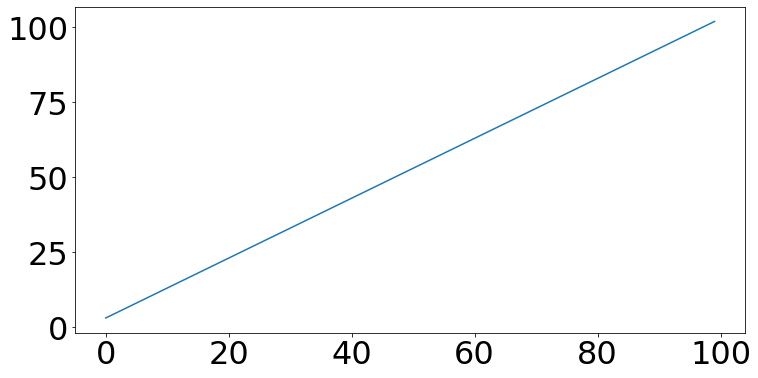

In [33]:
#lineAndRandomPoints.py
import numpy as np
import matplotlib.pyplot as plt

line = np.array([i + 3 for i in range(100)])
figure = plt.figure(figsize = (12, 6))
plt.plot(line)
plt.show()

The line created is the true line. We will generate points from normal distributions whose median values are indicated by the line using _normalvariate()_:

In [34]:
points.append(random.normalvariate(mu, sigma))  

NameError: name 'points' is not defined

Here, mu defines the expectation – the mean and, by implication, the median –  of the distribution and _sigma_ indicates the standard deviation. We will pass values from the line to both, thus increasing the mean and variance of the distribution.

In [ ]:
#lineAndRandomPoints.py
# . . .
import random
# . . .
points = []
for point in line:
    points.append(random.normalvariate(point, point))

figure = plt.figure(figsize = (12, 6))
plt.plot(line)
plt.scatter(np.arange(len(points)), points, s = 10)

plt.show()

Matplotlib automatically leaves a margin behind. Reduce the margins using plt.rcParams. This allows access to variables that define this margin. Reduce the margin to 0.

In [ ]:
#lineAndRandomPoints.py  
# . . .
figure = plt.figure(figsize = (12,6))  
plt.rcParams['axes.xmargin'] = 0  
plt.rcParams['axes.ymargin'] = 0  
plt.plot(line)  
plt.scatter(np.arange(len(points)), points, s = 10)  
plt.show()

A graph should have a title, labels, or both. Add a title using plt.title(). The size of this text is defined by fontsize.

In [ ]:
#lineAndRandomPoints.py  
# . . .
figure = plt.figure(figsize = (12,6))  
plt.rcParams['axes.xmargin'] = 0  
plt.rcParams['axes.ymargin'] = 0  
plt.plot(line, label = "Truth")  
plt.scatter(np.arange(len(points)), points, s = 10,   
            label = "Points from\nNormal Distribution")  
plt.title("Randomly Generated Points", fontsize = 16)  

plt.show()

Finally, we add labels to each of the types of objects in the graph. This is accomplished by adding *label = label_name* to _plt.plot()_ and _plt.scatter()_.

In [ ]:
#lineAndRandomPoints.py
# . . . 
figure = plt.figure(figsize = (12,6))  
plt.rcParams['axes.xmargin'] = 0  
plt.rcParams['axes.ymargin'] = 0  
plt.plot(line, label = "Truth")  
plt.scatter(np.arange(len(points)), points, s = 10,   
            label = "Points from\nNormal Distribution")  
plt.title("Randomly Generated Points", fontsize = 20)  
plt.legend(loc="best", fontsize = 20)  
plt.show()  

It may be convenient to create a functions that allow for control of a few features of the line, points, and visualizations. For simplicity, the standard deviation governing the creation of the scatter plot will now be a constant. Included is the final version of the script:

In [ ]:
#lineAndRandomPointsFunction.py  
import numpy as np  
import matplotlib.pyplot as plt  
import random  
  
def build_random_data_with_line(y_int, slope, SD = 1):  
  
    # line is defined by the y_intercept and slope  
    line = np.array([slope * (i + y_int) for i in range(100)])  
    points = []  
    for point in line:  
        points.append(random.normalvariate(point, SD))  
          
    return line, points  
  
def plot_line(line, points, line_name = "Truth",   
              title = "Randomly Generated Points"):  
      
    figure = plt.figure(figsize = (20,10))
    plt.rcParams['axes.ymargin'] = 0  
    plt.rcParams['axes.xmargin'] = 0  
    plt.plot(line, label = line_name)  
    plt.scatter(np.arange(len(points)),points, s = 10,   
                label = "Points from\nNormal Distribution")   
    plt.title(title, fontsize = 20)  
    plt.legend(loc="best", fontsize = 20)  
    plt.show()  
      
line, points = build_random_data_with_line(y_int = 3, slope = 1, SD = 10)  
plot_line(line, points)  

## Monte Carlo Simulation

In [ ]:
# montecarlo simulation
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt  
import random  

random_list = []
for i in range (1000):
    random_list.append(random.normalvariate(0, .5))
    
plt.plot(random_list, ls = "", marker = ".", markersize = 1)
plt.show()
plt.close()

simulation = []

for i in range(len(random_list)):
    val = random_list[i]
    if i == 0:
        simulation.append(val)
    else:
        simulation.append(simulation[i - 1] + val)
    
plt.plot(simulation)
plt.show()
plt.close()


mean = 0
sigma = 1
monte_carlo_sim_dict = {}
num_sims = 2000
periods = 1000
for i in range(num_sims):
    monte_carlo_sim_dict[i] = {}
    for period in range(periods):
        curr_sim = monte_carlo_sim_dict[i]
        if period == 0:
            curr_sim[period] = random.normalvariate(mean, sigma)
        else:
            curr_sim[period] = curr_sim[period - 1] + random.normalvariate(mean, sigma)

monte_carlo_sim_df = pd.DataFrame(monte_carlo_sim_dict)

plt.rcParams['axes.xmargin'] = 0  
plt.rcParams['axes.ymargin'] = 0 
plt.rcParams["font.size"] = 30
fig, ax = plt.subplots(figsize = (40, 24))
monte_carlo_sim_df.plot.line(legend = False, marker = ".", markersize = .1, 
                             color = "k", alpha = .1, ax = ax)
plt.show()
plt.close()

fig, ax = plt.subplots(figsize = (40, 24))
monte_carlo_sim_df.iloc[-1].hist(bins = 25, density = True,
                               ax = ax)
# set vertical axis values as percent
y_vals = ax.get_yticks()
ax.set_yticklabels([str(int(y * 100))+ "%" for y in y_vals]) 

plt.show()
plt.close()